## EXP_2389_seq_prune_04_4_64_run(1-10)
Dan Cox May 2021 CS299 Project

#### Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import warnings
from collections import OrderedDict

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten,Reshape
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import tempfile
import n_cut.n_cut as nc
import n_cut.MNIST_helper as mh

#### Make experiments dict

In [2]:
exp_dict = OrderedDict()

#### Get MNIST data

In [3]:
# Get mnist data split into train and test 60000 x 28 x 28 train, 10000 x 28 x28 test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

#### Run experiment many times (num_runs)

run 0
Instructions for updating:
Please use `layer.add_weight` method instead.
round0 [9 3 8 2]
9
Epoch 1/5
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1250/1250 - 6s - loss: 0.0442 - accuracy: 0.9843 - val_loss: 0.0632 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 5s - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.0693 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 5s - loss: 0.0038 - accuracy: 0.9988 - val_loss: 0.0566 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 5s - loss: 3.7561e-04 - accuracy: 0.9999 - val_loss: 0.0868 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 5s - loss: 6.9579e-06 - accuracy: 1.0000 - val_loss: 0.1073 - val_accuracy: 0.9882


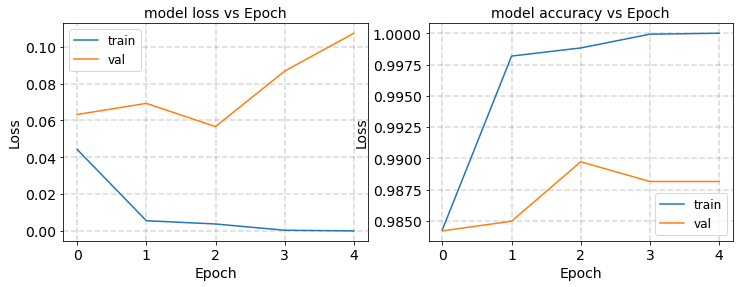

3
Epoch 1/5
1250/1250 - 6s - loss: 0.1192 - accuracy: 0.9691 - val_loss: 0.0752 - val_accuracy: 0.9771
Epoch 2/5
1250/1250 - 5s - loss: 0.0174 - accuracy: 0.9948 - val_loss: 0.0735 - val_accuracy: 0.9810
Epoch 3/5
1250/1250 - 6s - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.0790 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 5s - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0775 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 6s - loss: 5.8365e-04 - accuracy: 0.9999 - val_loss: 0.0836 - val_accuracy: 0.9858


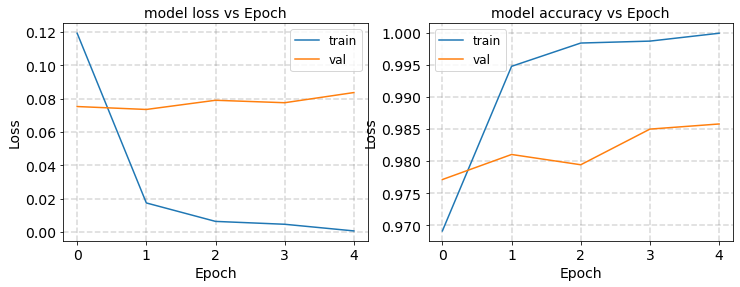

8
Epoch 1/5
1250/1250 - 6s - loss: 0.1024 - accuracy: 0.9741 - val_loss: 0.0480 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 5s - loss: 0.0132 - accuracy: 0.9960 - val_loss: 0.0545 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 6s - loss: 0.0061 - accuracy: 0.9982 - val_loss: 0.0817 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 6s - loss: 9.9149e-04 - accuracy: 0.9998 - val_loss: 0.0790 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 6s - loss: 4.9377e-04 - accuracy: 0.9999 - val_loss: 0.0864 - val_accuracy: 0.9874


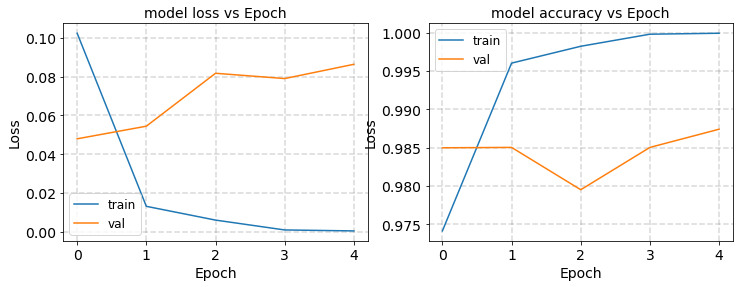

2
Epoch 1/5
1250/1250 - 6s - loss: 0.0894 - accuracy: 0.9842 - val_loss: 0.0320 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 6s - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0455 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 5s - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0459 - val_accuracy: 0.9937
Epoch 4/5
1250/1250 - 6s - loss: 2.9874e-04 - accuracy: 1.0000 - val_loss: 0.0491 - val_accuracy: 0.9929
Epoch 5/5
1250/1250 - 5s - loss: 4.2127e-05 - accuracy: 1.0000 - val_loss: 0.0532 - val_accuracy: 0.9937


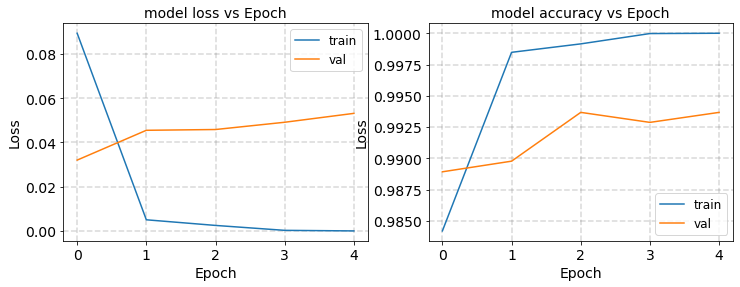

round1 [8 2 9 3]
8
Epoch 1/5
1250/1250 - 6s - loss: 0.0850 - accuracy: 0.9793 - val_loss: 0.0700 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 6s - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0708 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 6s - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0799 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 5s - loss: 1.1303e-04 - accuracy: 1.0000 - val_loss: 0.0813 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 6s - loss: 3.0186e-05 - accuracy: 1.0000 - val_loss: 0.0885 - val_accuracy: 0.9826


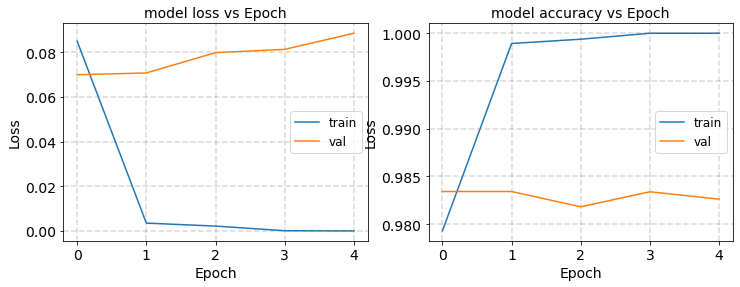

2
Epoch 1/5
1250/1250 - 6s - loss: 0.0807 - accuracy: 0.9877 - val_loss: 0.0557 - val_accuracy: 0.9914
Epoch 2/5
1250/1250 - 6s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0658 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 6s - loss: 8.2293e-05 - accuracy: 1.0000 - val_loss: 0.0919 - val_accuracy: 0.9922
Epoch 4/5
1250/1250 - 5s - loss: 1.3364e-05 - accuracy: 1.0000 - val_loss: 0.1060 - val_accuracy: 0.9922
Epoch 5/5
1250/1250 - 5s - loss: 4.9926e-06 - accuracy: 1.0000 - val_loss: 0.1145 - val_accuracy: 0.9922


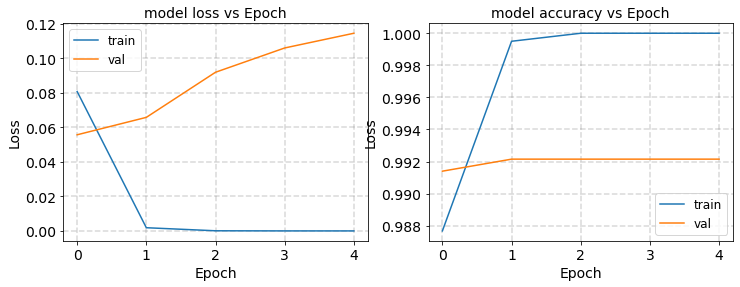

9
Epoch 1/5
1250/1250 - 6s - loss: 0.1265 - accuracy: 0.9784 - val_loss: 0.0496 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 6s - loss: 0.0092 - accuracy: 0.9972 - val_loss: 0.0432 - val_accuracy: 0.9842
Epoch 3/5
1250/1250 - 5s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0513 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 5s - loss: 1.4363e-04 - accuracy: 1.0000 - val_loss: 0.0655 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 6s - loss: 3.8488e-05 - accuracy: 1.0000 - val_loss: 0.0772 - val_accuracy: 0.9858


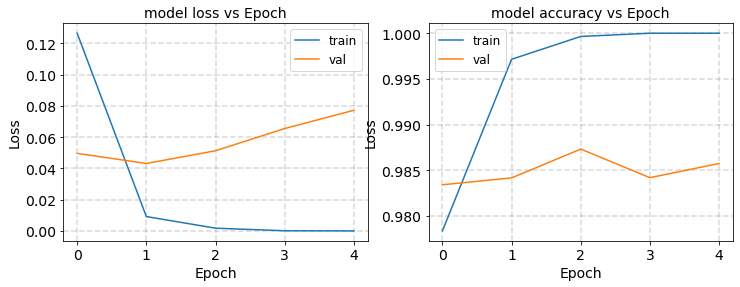

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1309 - accuracy: 0.9720 - val_loss: 0.0612 - val_accuracy: 0.9755
Epoch 2/5
1250/1250 - 6s - loss: 0.0186 - accuracy: 0.9946 - val_loss: 0.0759 - val_accuracy: 0.9794
Epoch 3/5
1250/1250 - 6s - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.1089 - val_accuracy: 0.9786
Epoch 4/5
1250/1250 - 7s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.1154 - val_accuracy: 0.9802
Epoch 5/5
1250/1250 - 7s - loss: 3.8426e-04 - accuracy: 0.9999 - val_loss: 0.1524 - val_accuracy: 0.9779


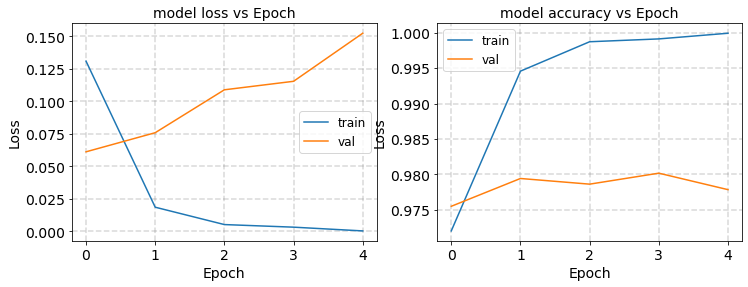

round2 [8 9 2 3]
8
Epoch 1/5
1250/1250 - 6s - loss: 0.0890 - accuracy: 0.9801 - val_loss: 0.0486 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 5s - loss: 0.0103 - accuracy: 0.9973 - val_loss: 0.0454 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 6s - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0664 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 6s - loss: 1.8022e-04 - accuracy: 1.0000 - val_loss: 0.0850 - val_accuracy: 0.9833
Epoch 5/5
1250/1250 - 6s - loss: 3.5321e-05 - accuracy: 1.0000 - val_loss: 0.0954 - val_accuracy: 0.9857


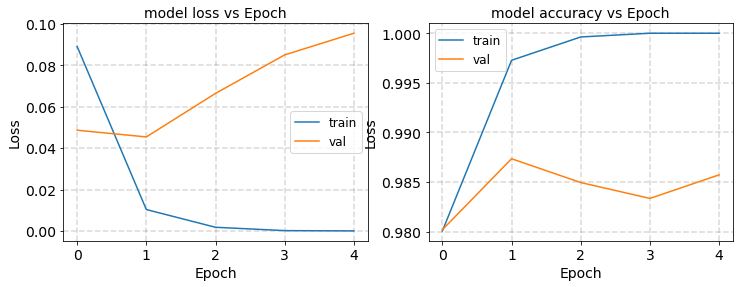

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0925 - accuracy: 0.9794 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 5s - loss: 0.0074 - accuracy: 0.9976 - val_loss: 0.0549 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 5s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0570 - val_accuracy: 0.9906
Epoch 4/5
1250/1250 - 5s - loss: 4.7150e-04 - accuracy: 0.9999 - val_loss: 0.0702 - val_accuracy: 0.9867
Epoch 5/5
1250/1250 - 5s - loss: 4.6509e-05 - accuracy: 1.0000 - val_loss: 0.0784 - val_accuracy: 0.9867


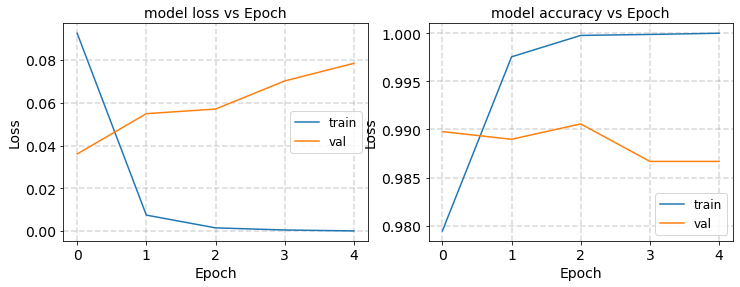

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1692 - accuracy: 0.9698 - val_loss: 0.0534 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 4s - loss: 0.0067 - accuracy: 0.9981 - val_loss: 0.0445 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9998 - val_loss: 0.0551 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 1.6131e-04 - accuracy: 1.0000 - val_loss: 0.0734 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 4.4768e-05 - accuracy: 1.0000 - val_loss: 0.0838 - val_accuracy: 0.9882


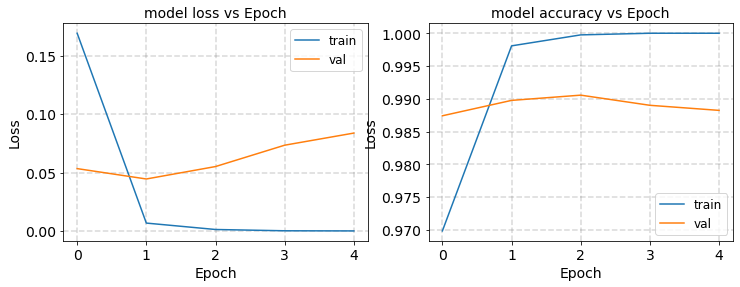

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1611 - accuracy: 0.9723 - val_loss: 0.0688 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0079 - accuracy: 0.9979 - val_loss: 0.0974 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0981 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.1006 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 4s - loss: 7.6155e-05 - accuracy: 1.0000 - val_loss: 0.1130 - val_accuracy: 0.9834


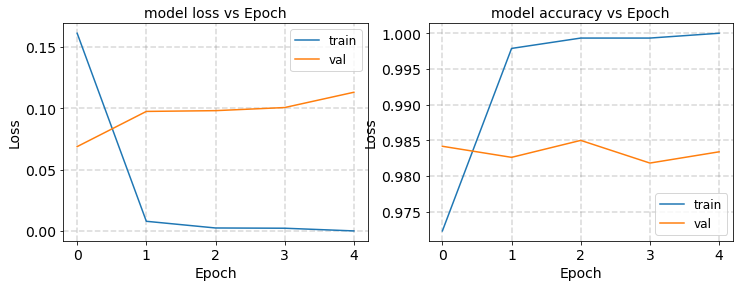

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten  (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense (P (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_1  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_2  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_3  (None, 64)                8258      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

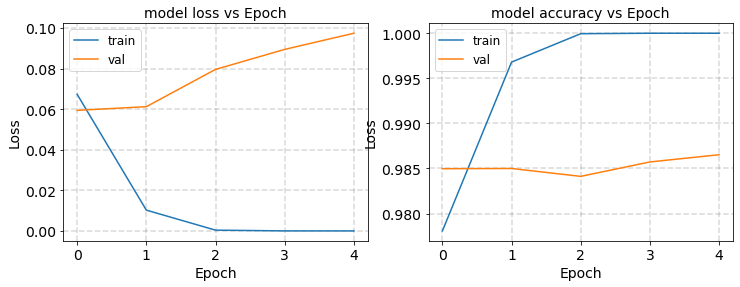

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0724 - accuracy: 0.9835 - val_loss: 0.0578 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0104 - accuracy: 0.9975 - val_loss: 0.0511 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 3s - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0909 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0641 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.0784 - val_accuracy: 0.9905


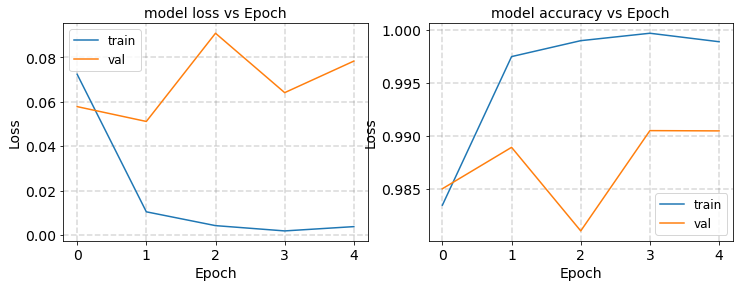

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0891 - accuracy: 0.9784 - val_loss: 0.0561 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 4s - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0699 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 4s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0909 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 7.7273e-05 - accuracy: 1.0000 - val_loss: 0.1002 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 4s - loss: 2.1653e-05 - accuracy: 1.0000 - val_loss: 0.1093 - val_accuracy: 0.9890


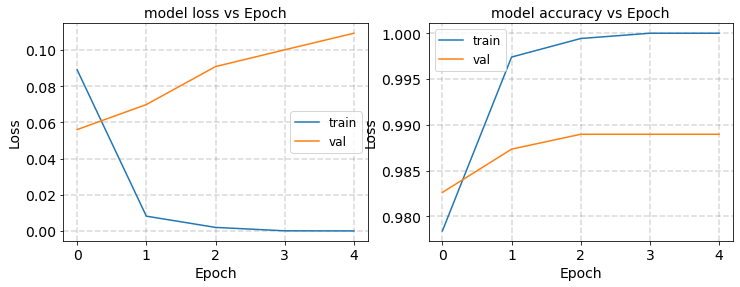

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0988 - accuracy: 0.9755 - val_loss: 0.0575 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 4s - loss: 0.0119 - accuracy: 0.9967 - val_loss: 0.0748 - val_accuracy: 0.9817
Epoch 3/5
1250/1250 - 4s - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0685 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 4s - loss: 8.3473e-04 - accuracy: 0.9998 - val_loss: 0.0802 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 5.1727e-05 - accuracy: 1.0000 - val_loss: 0.0900 - val_accuracy: 0.9850


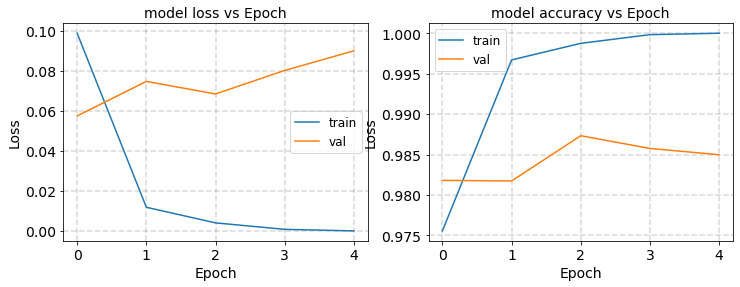

round1 [8 9 2 3]
8
Epoch 1/5
1250/1250 - 4s - loss: 1.9021e-05 - accuracy: 1.0000 - val_loss: 0.0979 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 5s - loss: 7.6558e-06 - accuracy: 1.0000 - val_loss: 0.1073 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 3.0749e-06 - accuracy: 1.0000 - val_loss: 0.1162 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 1.2874e-06 - accuracy: 1.0000 - val_loss: 0.1245 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 5.8271e-07 - accuracy: 1.0000 - val_loss: 0.1301 - val_accuracy: 0.9858


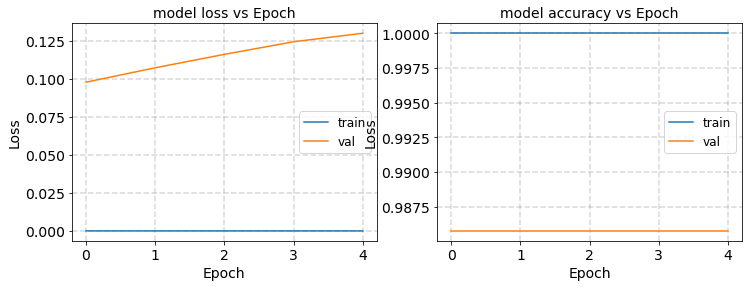

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0841 - accuracy: 0.9859 - val_loss: 0.0801 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 5s - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0930 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 5s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1190 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 5s - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.1076 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 4.9171e-05 - accuracy: 1.0000 - val_loss: 0.1212 - val_accuracy: 0.9858


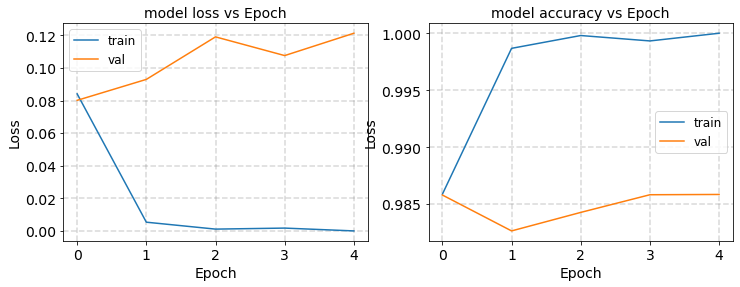

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1014 - accuracy: 0.9836 - val_loss: 0.0526 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 5s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0788 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 5s - loss: 2.8691e-04 - accuracy: 1.0000 - val_loss: 0.0824 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 5s - loss: 6.6839e-05 - accuracy: 1.0000 - val_loss: 0.0908 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 5s - loss: 2.3981e-05 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9889


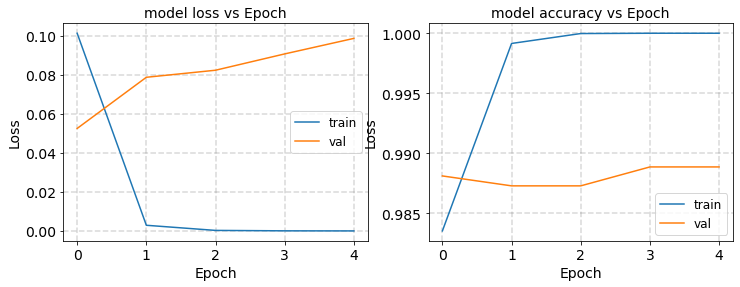

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1266 - accuracy: 0.9717 - val_loss: 0.0798 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 5s - loss: 0.0132 - accuracy: 0.9963 - val_loss: 0.1052 - val_accuracy: 0.9810
Epoch 3/5
1250/1250 - 5s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.1397 - val_accuracy: 0.9802
Epoch 4/5
1250/1250 - 4s - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.1395 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 4s - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.1520 - val_accuracy: 0.9794


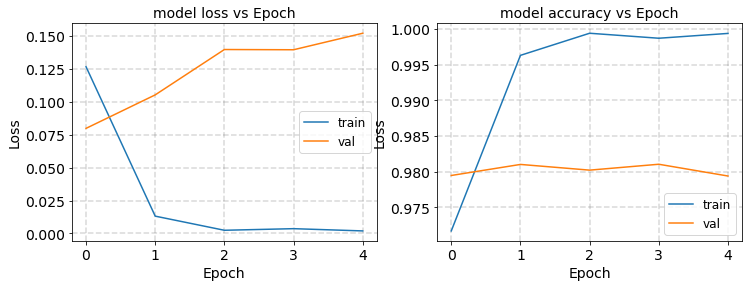

round2 [3 2 9 8]
3
Epoch 1/5
1250/1250 - 5s - loss: 1.2902e-04 - accuracy: 1.0000 - val_loss: 0.1679 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 4s - loss: 3.4402e-05 - accuracy: 1.0000 - val_loss: 0.1808 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 5s - loss: 1.6306e-05 - accuracy: 1.0000 - val_loss: 0.1939 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 5s - loss: 7.8318e-06 - accuracy: 1.0000 - val_loss: 0.2059 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 4s - loss: 3.7656e-06 - accuracy: 1.0000 - val_loss: 0.2188 - val_accuracy: 0.9834


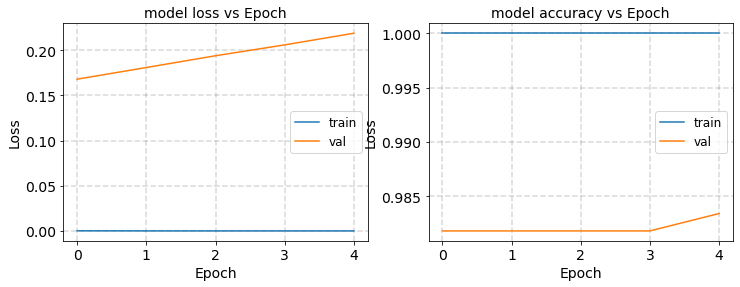

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1079 - accuracy: 0.9811 - val_loss: 0.0654 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 4s - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0902 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 4s - loss: 8.1277e-04 - accuracy: 0.9998 - val_loss: 0.1089 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 4s - loss: 1.1680e-04 - accuracy: 1.0000 - val_loss: 0.1253 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 4s - loss: 2.5532e-05 - accuracy: 1.0000 - val_loss: 0.1395 - val_accuracy: 0.9889


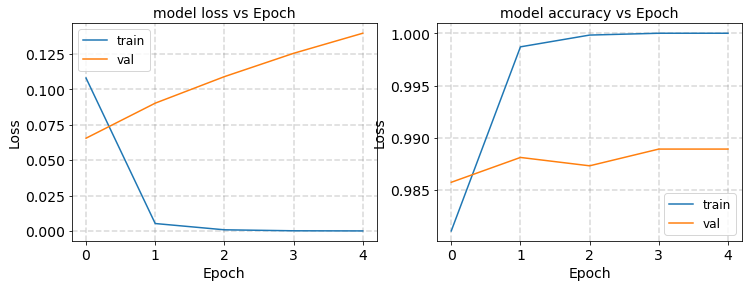

9
Epoch 1/5
1250/1250 - 5s - loss: 0.1195 - accuracy: 0.9831 - val_loss: 0.0664 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 5s - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0742 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 6.8139e-04 - accuracy: 0.9998 - val_loss: 0.0913 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 6s - loss: 9.0341e-05 - accuracy: 1.0000 - val_loss: 0.0994 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 6s - loss: 2.6177e-05 - accuracy: 1.0000 - val_loss: 0.1085 - val_accuracy: 0.9866


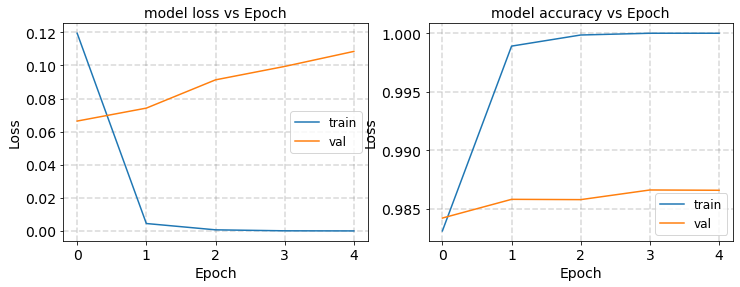

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1352 - accuracy: 0.9606 - val_loss: 0.0653 - val_accuracy: 0.9739
Epoch 2/5
1250/1250 - 5s - loss: 0.0125 - accuracy: 0.9959 - val_loss: 0.0870 - val_accuracy: 0.9770
Epoch 3/5
1250/1250 - 5s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.1428 - val_accuracy: 0.9762
Epoch 4/5
1250/1250 - 5s - loss: 3.3191e-04 - accuracy: 0.9999 - val_loss: 0.1478 - val_accuracy: 0.9762
Epoch 5/5
1250/1250 - 5s - loss: 5.1551e-05 - accuracy: 1.0000 - val_loss: 0.1677 - val_accuracy: 0.9786


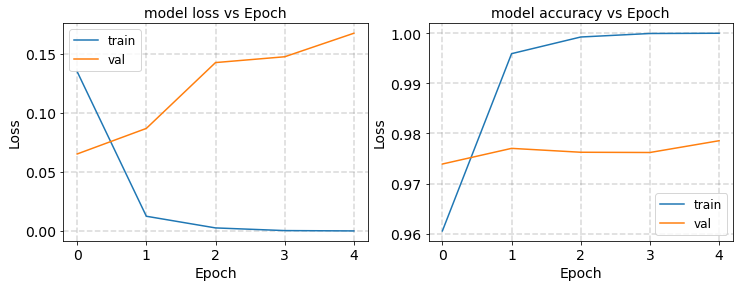

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_6  (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_7  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_8  (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_9  (None, 64)                8258      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

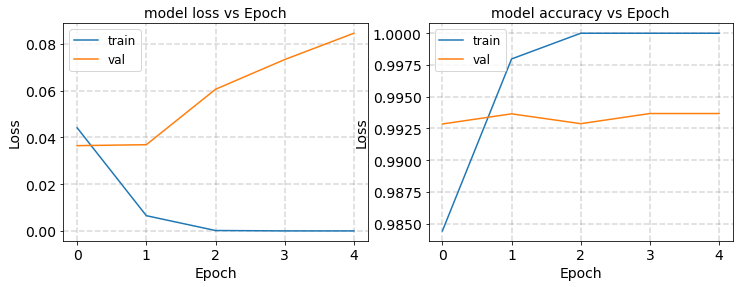

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0704 - accuracy: 0.9855 - val_loss: 0.0703 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 4s - loss: 0.0061 - accuracy: 0.9978 - val_loss: 0.0758 - val_accuracy: 0.9897
Epoch 3/5
1250/1250 - 4s - loss: 4.5143e-04 - accuracy: 0.9999 - val_loss: 0.1003 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 4s - loss: 3.2332e-05 - accuracy: 1.0000 - val_loss: 0.1130 - val_accuracy: 0.9881
Epoch 5/5
1250/1250 - 4s - loss: 1.1399e-05 - accuracy: 1.0000 - val_loss: 0.1235 - val_accuracy: 0.9881


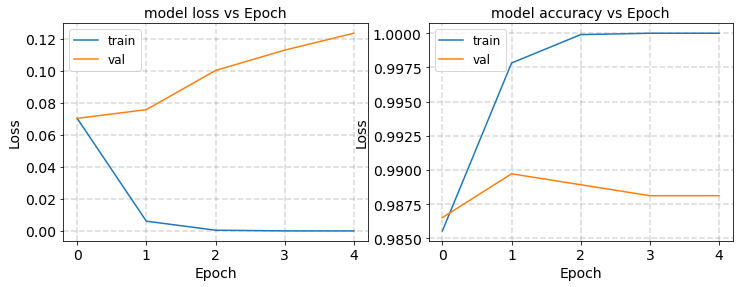

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1037 - accuracy: 0.9773 - val_loss: 0.0763 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 4s - loss: 0.0124 - accuracy: 0.9965 - val_loss: 0.0921 - val_accuracy: 0.9786
Epoch 3/5
1250/1250 - 4s - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.1470 - val_accuracy: 0.9802
Epoch 4/5
1250/1250 - 4s - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.1066 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 1.5482e-04 - accuracy: 1.0000 - val_loss: 0.1239 - val_accuracy: 0.9850


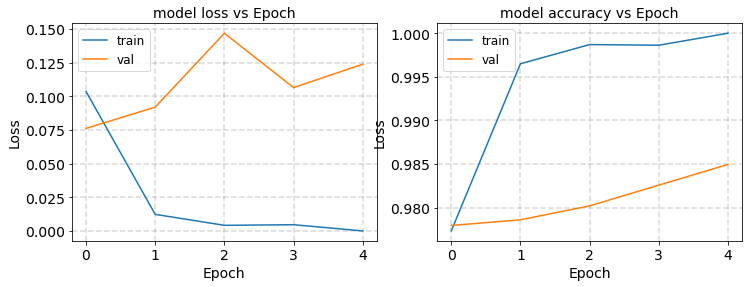

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1108 - accuracy: 0.9709 - val_loss: 0.0488 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 5s - loss: 0.0139 - accuracy: 0.9965 - val_loss: 0.0618 - val_accuracy: 0.9801
Epoch 3/5
1250/1250 - 5s - loss: 0.0055 - accuracy: 0.9984 - val_loss: 0.0751 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.0830 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 5s - loss: 5.3045e-04 - accuracy: 0.9999 - val_loss: 0.0917 - val_accuracy: 0.9841


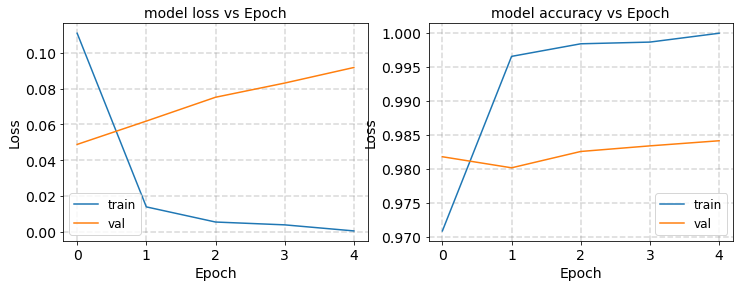

round1 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 5s - loss: 0.0796 - accuracy: 0.9823 - val_loss: 0.0410 - val_accuracy: 0.9865
Epoch 2/5
1250/1250 - 4s - loss: 0.0100 - accuracy: 0.9963 - val_loss: 0.0529 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 5s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0617 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 5s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0647 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 5s - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0778 - val_accuracy: 0.9881


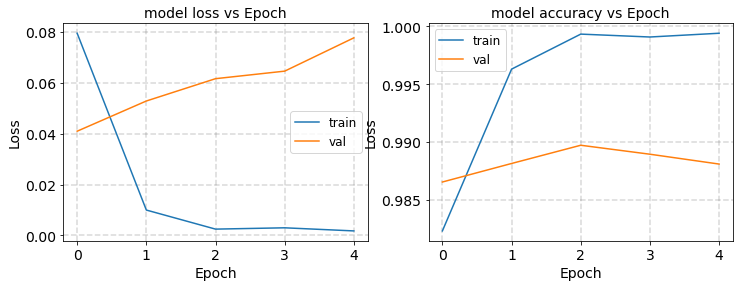

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0896 - accuracy: 0.9794 - val_loss: 0.1011 - val_accuracy: 0.9794
Epoch 2/5
1250/1250 - 4s - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.1317 - val_accuracy: 0.9731
Epoch 3/5
1250/1250 - 5s - loss: 8.7709e-04 - accuracy: 0.9998 - val_loss: 0.1593 - val_accuracy: 0.9754
Epoch 4/5
1250/1250 - 5s - loss: 9.3181e-05 - accuracy: 1.0000 - val_loss: 0.1826 - val_accuracy: 0.9786
Epoch 5/5
1250/1250 - 6s - loss: 2.0860e-05 - accuracy: 1.0000 - val_loss: 0.2019 - val_accuracy: 0.9778


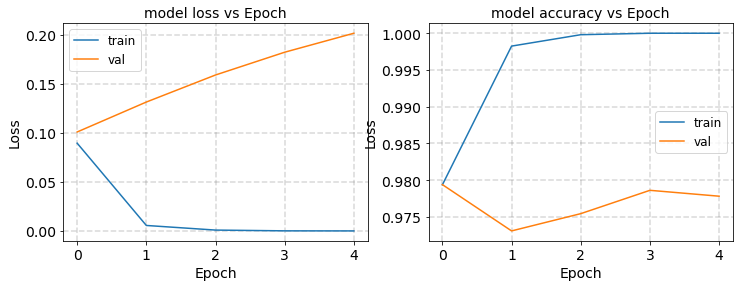

3
Epoch 1/5
1250/1250 - 7s - loss: 0.1238 - accuracy: 0.9718 - val_loss: 0.0628 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 7s - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0819 - val_accuracy: 0.9849
Epoch 3/5
1250/1250 - 5s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.1103 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 6s - loss: 3.8360e-04 - accuracy: 0.9999 - val_loss: 0.1353 - val_accuracy: 0.9833
Epoch 5/5
1250/1250 - 7s - loss: 5.0548e-05 - accuracy: 1.0000 - val_loss: 0.1520 - val_accuracy: 0.9841


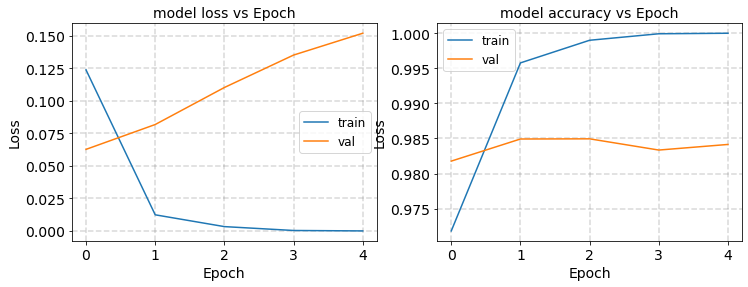

2
Epoch 1/5
1250/1250 - 6s - loss: 0.1370 - accuracy: 0.9743 - val_loss: 0.0588 - val_accuracy: 0.9857
Epoch 2/5
1250/1250 - 7s - loss: 0.0100 - accuracy: 0.9974 - val_loss: 0.0537 - val_accuracy: 0.9881
Epoch 3/5
1250/1250 - 6s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0473 - val_accuracy: 0.9929
Epoch 4/5
1250/1250 - 6s - loss: 5.5501e-04 - accuracy: 0.9998 - val_loss: 0.0535 - val_accuracy: 0.9937
Epoch 5/5
1250/1250 - 6s - loss: 8.3727e-05 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9920


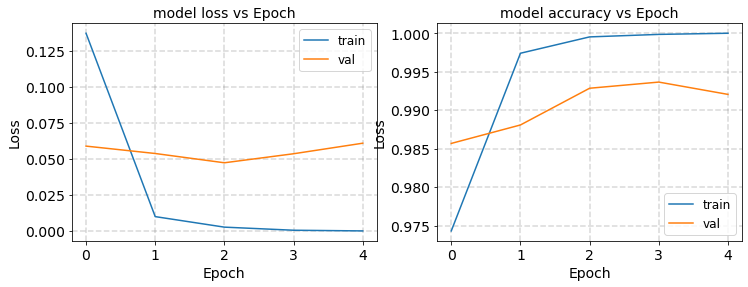

round2 [9 3 8 2]
9
Epoch 1/5
1250/1250 - 6s - loss: 0.1116 - accuracy: 0.9820 - val_loss: 0.0714 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 6s - loss: 0.0138 - accuracy: 0.9959 - val_loss: 0.0748 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 6s - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.0801 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 6s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1015 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1096 - val_accuracy: 0.9866


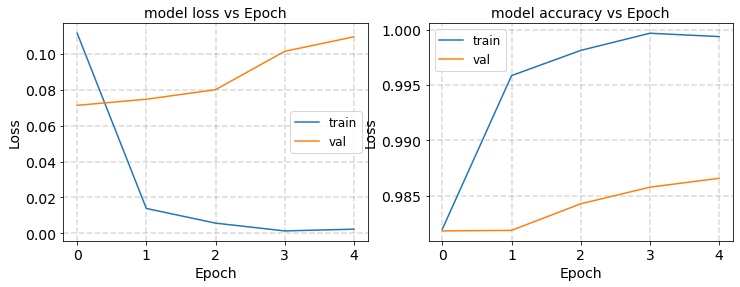

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1670 - accuracy: 0.9579 - val_loss: 0.0767 - val_accuracy: 0.9754
Epoch 2/5
1250/1250 - 5s - loss: 0.0292 - accuracy: 0.9897 - val_loss: 0.1176 - val_accuracy: 0.9707
Epoch 3/5
1250/1250 - 5s - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.1609 - val_accuracy: 0.9747
Epoch 4/5
1250/1250 - 4s - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.1710 - val_accuracy: 0.9779
Epoch 5/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.1684 - val_accuracy: 0.9795


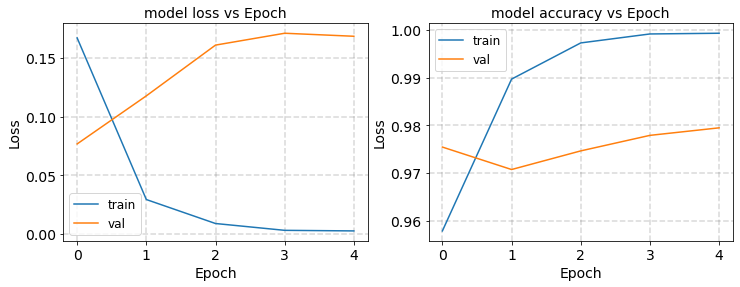

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1338 - accuracy: 0.9674 - val_loss: 0.0702 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 4s - loss: 0.0164 - accuracy: 0.9945 - val_loss: 0.0639 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 4s - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0795 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0809 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 3.8609e-04 - accuracy: 0.9999 - val_loss: 0.0978 - val_accuracy: 0.9843


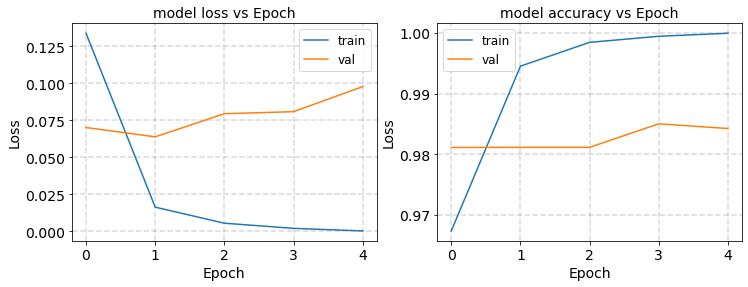

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1449 - accuracy: 0.9689 - val_loss: 0.0551 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0506 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0602 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0810 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 3.8501e-04 - accuracy: 1.0000 - val_loss: 0.0967 - val_accuracy: 0.9905


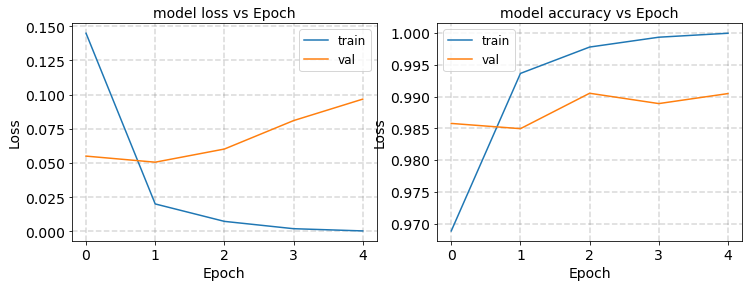

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_12 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_13 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_14 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_15 (None, 64)                8258      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

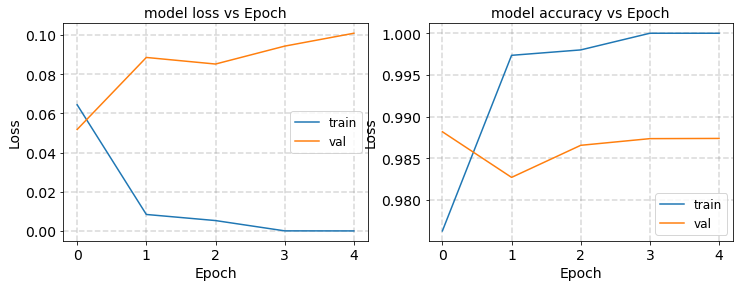

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0682 - accuracy: 0.9830 - val_loss: 0.0355 - val_accuracy: 0.9905
Epoch 2/5
1250/1250 - 3s - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.0382 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 3s - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.0337 - val_accuracy: 0.9945
Epoch 4/5
1250/1250 - 3s - loss: 1.0143e-04 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9945
Epoch 5/5
1250/1250 - 3s - loss: 2.4190e-05 - accuracy: 1.0000 - val_loss: 0.0447 - val_accuracy: 0.9945


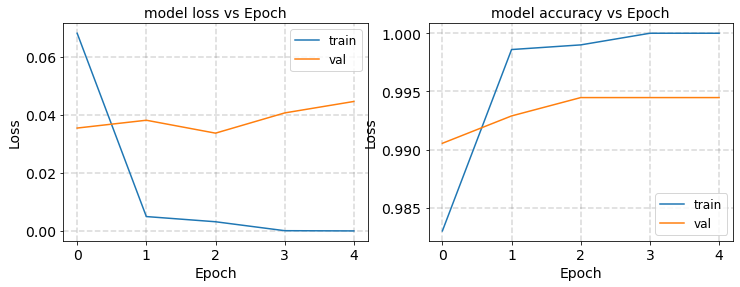

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1024 - accuracy: 0.9757 - val_loss: 0.0678 - val_accuracy: 0.9786
Epoch 2/5
1250/1250 - 4s - loss: 0.0193 - accuracy: 0.9941 - val_loss: 0.0765 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 4s - loss: 0.0070 - accuracy: 0.9978 - val_loss: 0.0753 - val_accuracy: 0.9858
Epoch 4/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0965 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 4s - loss: 4.8690e-05 - accuracy: 1.0000 - val_loss: 0.1096 - val_accuracy: 0.9818


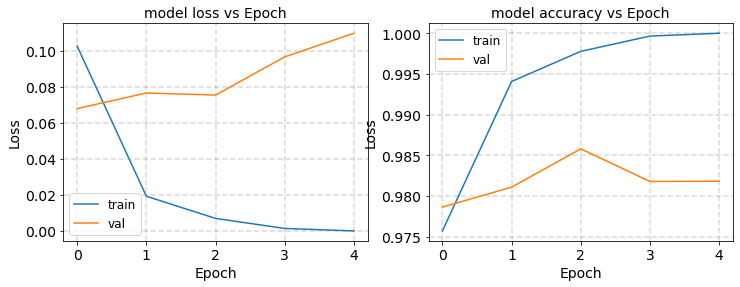

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0863 - accuracy: 0.9836 - val_loss: 0.0784 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 4s - loss: 0.0109 - accuracy: 0.9964 - val_loss: 0.0966 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.1120 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.1246 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 4s - loss: 1.9795e-04 - accuracy: 0.9999 - val_loss: 0.1359 - val_accuracy: 0.9858


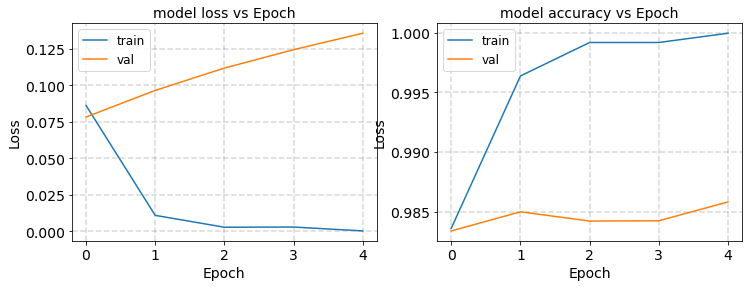

round1 [3 9 8 2]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.0881 - accuracy: 0.9810 - val_loss: 0.0814 - val_accuracy: 0.9810
Epoch 2/5
1250/1250 - 4s - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0924 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.1154 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 4s - loss: 8.0929e-05 - accuracy: 1.0000 - val_loss: 0.1406 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 4s - loss: 1.7926e-05 - accuracy: 1.0000 - val_loss: 0.1582 - val_accuracy: 0.9850


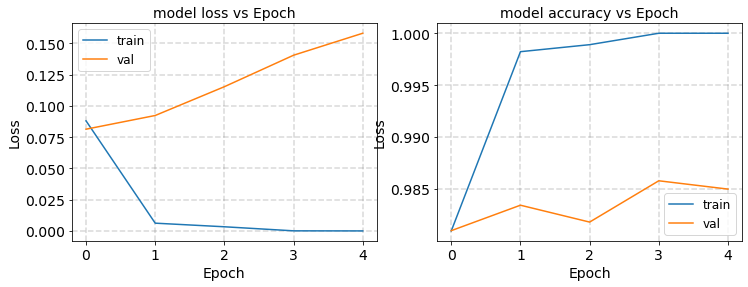

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0770 - accuracy: 0.9871 - val_loss: 0.0750 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.1073 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 4s - loss: 2.3978e-04 - accuracy: 0.9999 - val_loss: 0.1277 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 3s - loss: 4.1589e-05 - accuracy: 1.0000 - val_loss: 0.1439 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 1.5880e-05 - accuracy: 1.0000 - val_loss: 0.1587 - val_accuracy: 0.9882


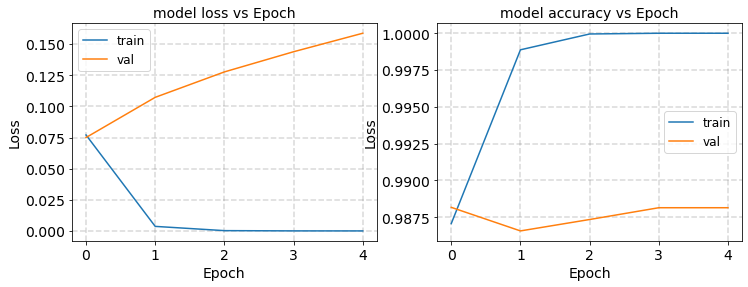

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1070 - accuracy: 0.9725 - val_loss: 0.0399 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 3s - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0582 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 3s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0922 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 4s - loss: 7.1763e-04 - accuracy: 0.9997 - val_loss: 0.0936 - val_accuracy: 0.9795
Epoch 5/5
1250/1250 - 4s - loss: 6.9735e-05 - accuracy: 1.0000 - val_loss: 0.1062 - val_accuracy: 0.9787


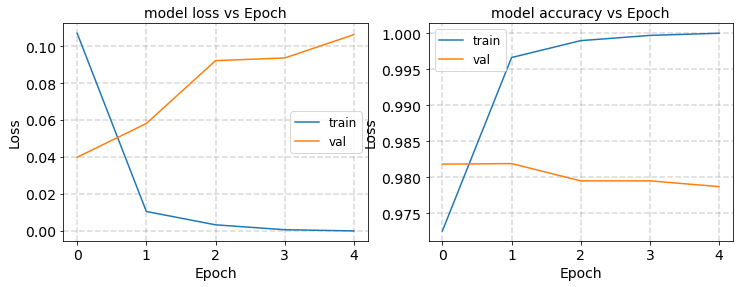

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0946 - accuracy: 0.9811 - val_loss: 0.0563 - val_accuracy: 0.9842
Epoch 2/5
1250/1250 - 4s - loss: 0.0106 - accuracy: 0.9970 - val_loss: 0.0419 - val_accuracy: 0.9929
Epoch 3/5
1250/1250 - 4s - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0651 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 3.0939e-04 - accuracy: 0.9999 - val_loss: 0.0805 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.0797 - val_accuracy: 0.9906


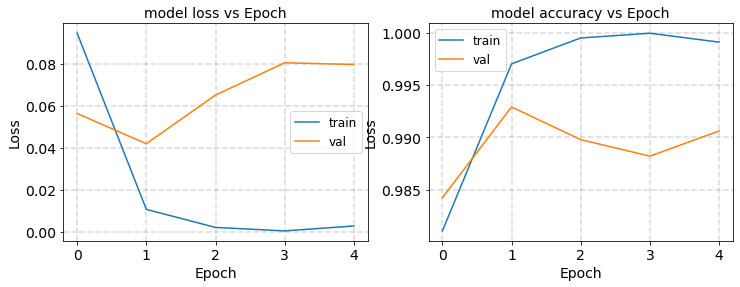

round2 [8 2 3 9]
8
Epoch 1/5
1250/1250 - 4s - loss: 0.1103 - accuracy: 0.9761 - val_loss: 0.0662 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 4s - loss: 0.0062 - accuracy: 0.9984 - val_loss: 0.0836 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 3s - loss: 6.4746e-04 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 3s - loss: 1.3319e-04 - accuracy: 1.0000 - val_loss: 0.1150 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 4.5530e-05 - accuracy: 1.0000 - val_loss: 0.1250 - val_accuracy: 0.9826


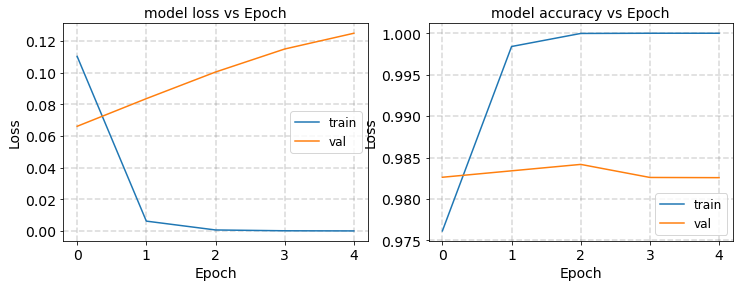

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0774 - accuracy: 0.9894 - val_loss: 0.0558 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 4s - loss: 3.7301e-04 - accuracy: 1.0000 - val_loss: 0.0642 - val_accuracy: 0.9905
Epoch 3/5
1250/1250 - 3s - loss: 7.1307e-05 - accuracy: 1.0000 - val_loss: 0.0744 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 3s - loss: 2.5785e-05 - accuracy: 1.0000 - val_loss: 0.0814 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 4s - loss: 1.0865e-05 - accuracy: 1.0000 - val_loss: 0.0884 - val_accuracy: 0.9905


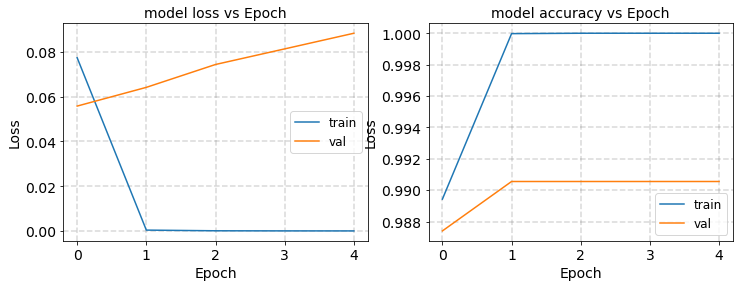

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1471 - accuracy: 0.9715 - val_loss: 0.0817 - val_accuracy: 0.9763
Epoch 2/5
1250/1250 - 3s - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.0976 - val_accuracy: 0.9763
Epoch 3/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.1282 - val_accuracy: 0.9811
Epoch 4/5
1250/1250 - 4s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.1622 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 4s - loss: 7.6496e-05 - accuracy: 1.0000 - val_loss: 0.1876 - val_accuracy: 0.9811


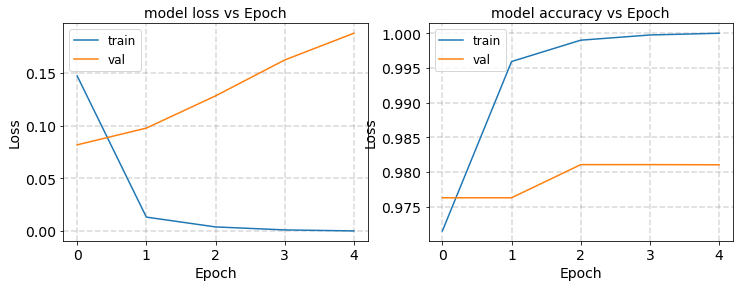

9
Epoch 1/5
1250/1250 - 4s - loss: 0.1025 - accuracy: 0.9836 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0067 - accuracy: 0.9979 - val_loss: 0.0584 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0689 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 4s - loss: 2.2644e-04 - accuracy: 1.0000 - val_loss: 0.0862 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 5.1819e-05 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 0.9866


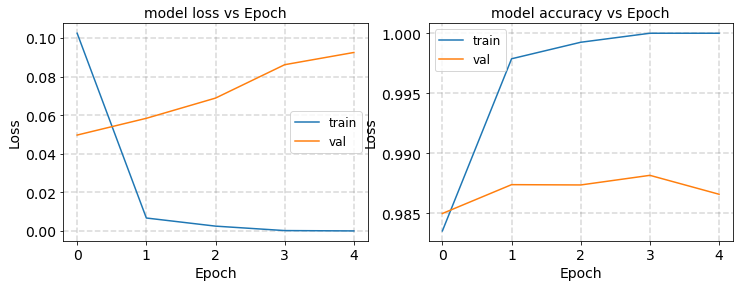

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_18 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_19 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_20 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_21 (None, 64)                8258      
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

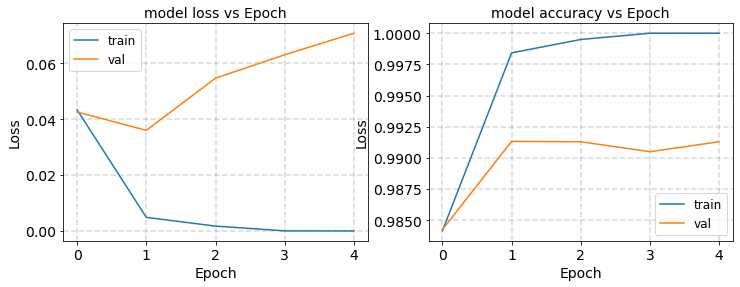

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0918 - accuracy: 0.9720 - val_loss: 0.0574 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0686 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 3s - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0793 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9982 - val_loss: 0.1195 - val_accuracy: 0.9763
Epoch 5/5
1250/1250 - 3s - loss: 7.3527e-04 - accuracy: 0.9997 - val_loss: 0.1059 - val_accuracy: 0.9818


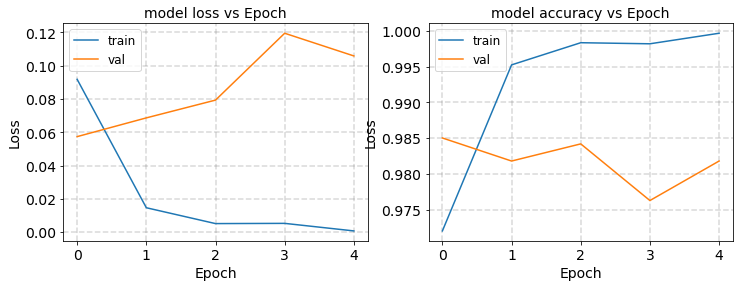

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1169 - accuracy: 0.9684 - val_loss: 0.0594 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 3s - loss: 0.0229 - accuracy: 0.9937 - val_loss: 0.0599 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0088 - accuracy: 0.9979 - val_loss: 0.0874 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 3s - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0795 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0901 - val_accuracy: 0.9858


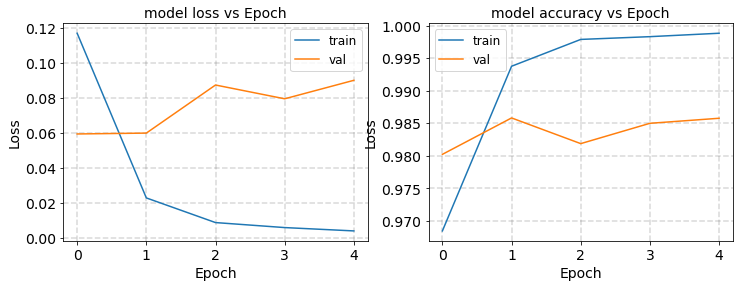

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1127 - accuracy: 0.9730 - val_loss: 0.0621 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0146 - accuracy: 0.9958 - val_loss: 0.0565 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 0.0060 - accuracy: 0.9987 - val_loss: 0.0829 - val_accuracy: 0.9866
Epoch 4/5
1250/1250 - 4s - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0879 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 7.7410e-04 - accuracy: 0.9998 - val_loss: 0.1133 - val_accuracy: 0.9866


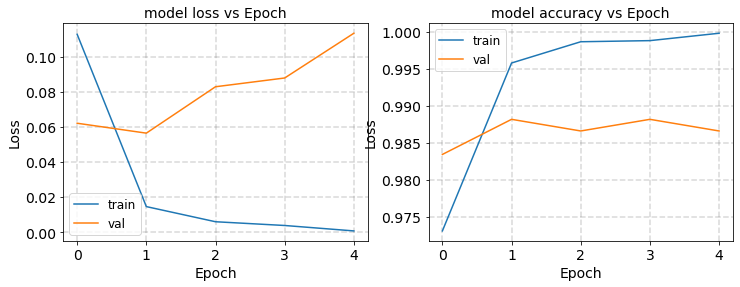

round1 [9 3 2 8]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.0949 - accuracy: 0.9765 - val_loss: 0.0552 - val_accuracy: 0.9858
Epoch 2/5
1250/1250 - 3s - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.0553 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0617 - val_accuracy: 0.9889
Epoch 4/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9989 - val_loss: 0.0725 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 3s - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0974 - val_accuracy: 0.9850


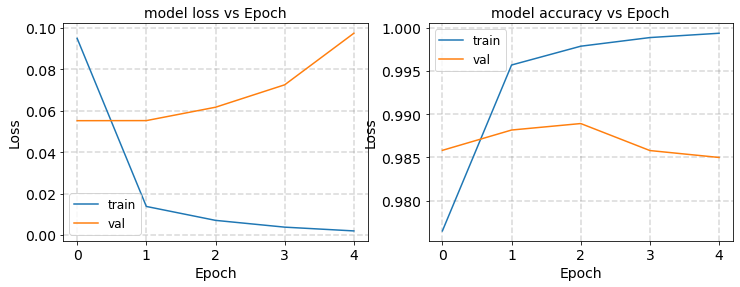

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1148 - accuracy: 0.9715 - val_loss: 0.0639 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 3s - loss: 0.0127 - accuracy: 0.9960 - val_loss: 0.0856 - val_accuracy: 0.9827
Epoch 3/5
1250/1250 - 3s - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.1026 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.1273 - val_accuracy: 0.9843
Epoch 5/5
1250/1250 - 3s - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.1476 - val_accuracy: 0.9866


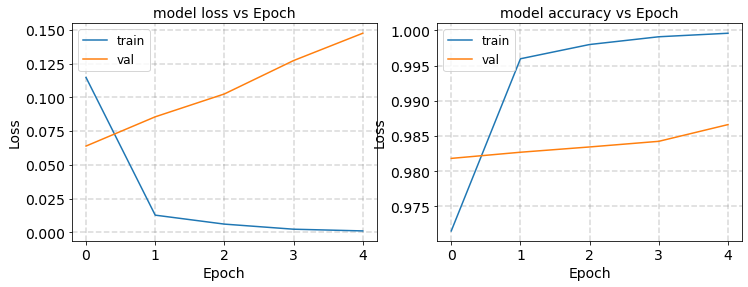

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1127 - accuracy: 0.9761 - val_loss: 0.0770 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 2s - loss: 0.0094 - accuracy: 0.9976 - val_loss: 0.0762 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0999 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 2s - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.1092 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 7.1370e-04 - accuracy: 0.9998 - val_loss: 0.1208 - val_accuracy: 0.9842


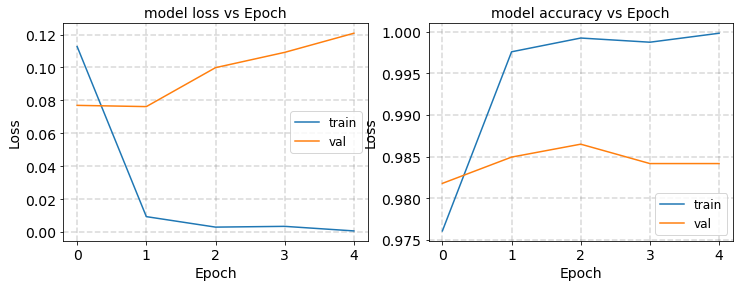

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0965 - accuracy: 0.9750 - val_loss: 0.0578 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 3s - loss: 0.0135 - accuracy: 0.9961 - val_loss: 0.0651 - val_accuracy: 0.9787
Epoch 3/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0994 - val_accuracy: 0.9787
Epoch 4/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.1034 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 3s - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.1033 - val_accuracy: 0.9810


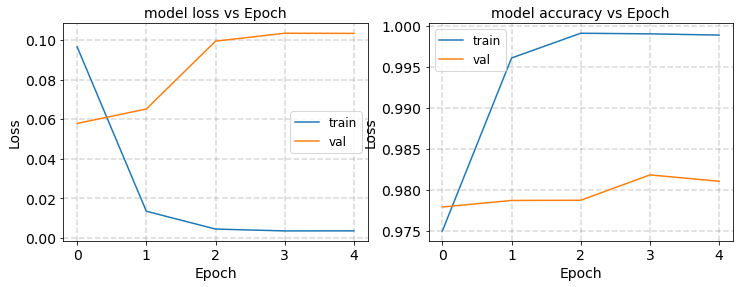

round2 [3 8 9 2]
3
Epoch 1/5
1250/1250 - 3s - loss: 0.0928 - accuracy: 0.9784 - val_loss: 0.0787 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.1052 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.1240 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.1201 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 3s - loss: 2.4544e-04 - accuracy: 1.0000 - val_loss: 0.1399 - val_accuracy: 0.9834


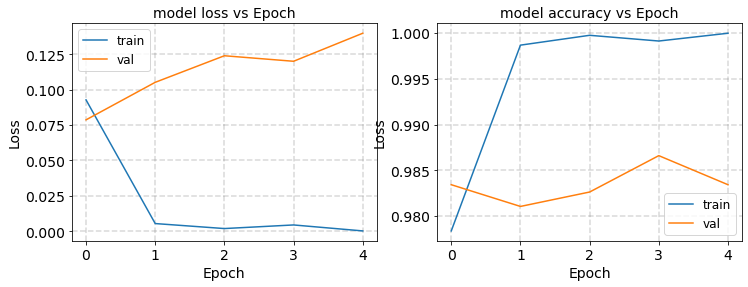

8
Epoch 1/5
1250/1250 - 3s - loss: 0.0818 - accuracy: 0.9840 - val_loss: 0.0658 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0892 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 4s - loss: 3.0330e-04 - accuracy: 1.0000 - val_loss: 0.1002 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 4.2552e-05 - accuracy: 1.0000 - val_loss: 0.1100 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 1.4282e-05 - accuracy: 1.0000 - val_loss: 0.1184 - val_accuracy: 0.9826


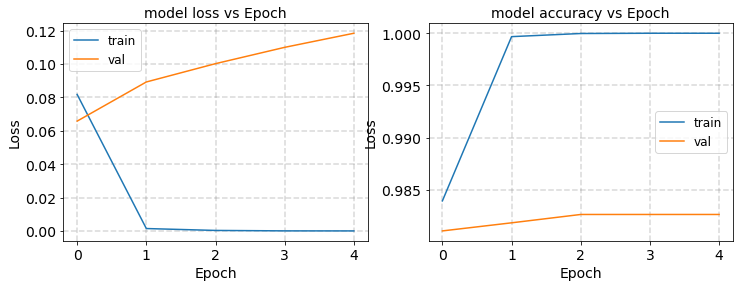

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0984 - accuracy: 0.9848 - val_loss: 0.0489 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0061 - accuracy: 0.9977 - val_loss: 0.0607 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 7.8016e-04 - accuracy: 0.9998 - val_loss: 0.0789 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 7.3805e-05 - accuracy: 1.0000 - val_loss: 0.0934 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 2.2373e-05 - accuracy: 1.0000 - val_loss: 0.1009 - val_accuracy: 0.9905


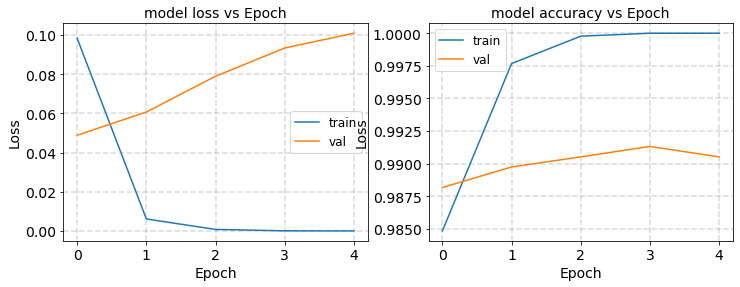

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1783 - accuracy: 0.9768 - val_loss: 0.0793 - val_accuracy: 0.9794
Epoch 2/5
1250/1250 - 5s - loss: 0.0085 - accuracy: 0.9975 - val_loss: 0.0865 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.1014 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.1185 - val_accuracy: 0.9866
Epoch 5/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.1337 - val_accuracy: 0.9850


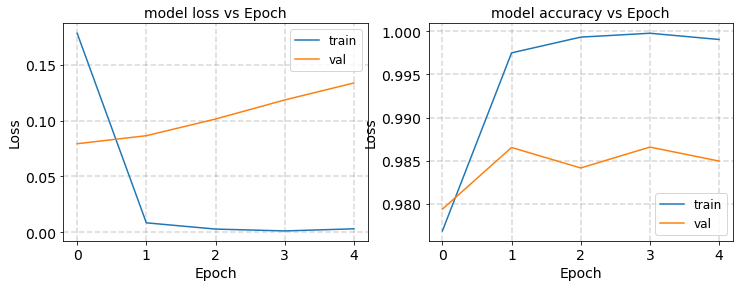

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_24 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_25 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_26 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_27 (None, 64)                8258      
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
____________________________________________

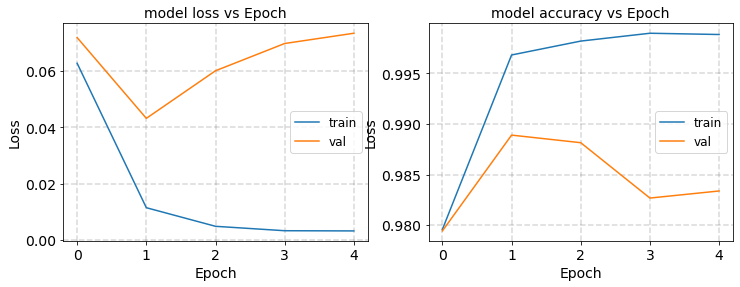

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0734 - accuracy: 0.9823 - val_loss: 0.0425 - val_accuracy: 0.9897
Epoch 2/5
1250/1250 - 5s - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.0505 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0628 - val_accuracy: 0.9921
Epoch 4/5
1250/1250 - 4s - loss: 5.8516e-05 - accuracy: 1.0000 - val_loss: 0.0723 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 1.9329e-05 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9913


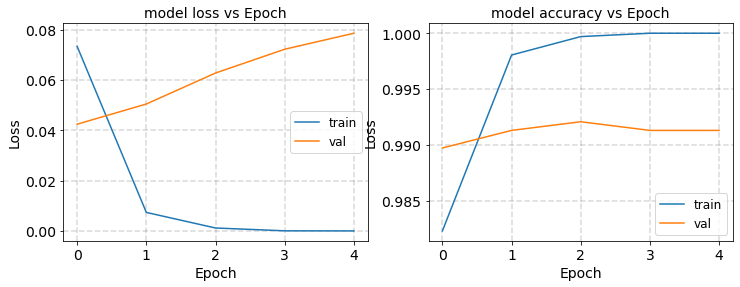

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0883 - accuracy: 0.9773 - val_loss: 0.0782 - val_accuracy: 0.9820
Epoch 2/5
1250/1250 - 4s - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0725 - val_accuracy: 0.9811
Epoch 3/5
1250/1250 - 4s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.1302 - val_accuracy: 0.9756
Epoch 4/5
1250/1250 - 4s - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0905 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 4s - loss: 7.3202e-05 - accuracy: 1.0000 - val_loss: 0.0989 - val_accuracy: 0.9827


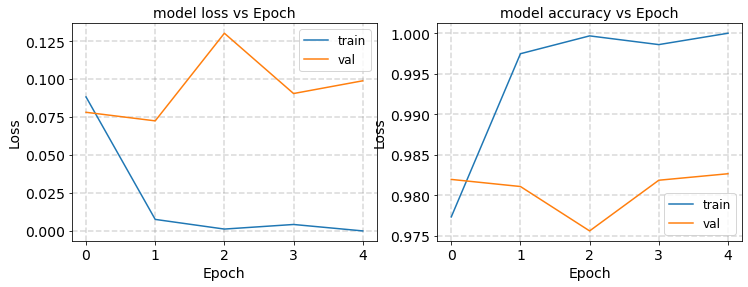

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0734 - accuracy: 0.9849 - val_loss: 0.0406 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 5s - loss: 0.0059 - accuracy: 0.9982 - val_loss: 0.0385 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0540 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 5s - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0712 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0650 - val_accuracy: 0.9913


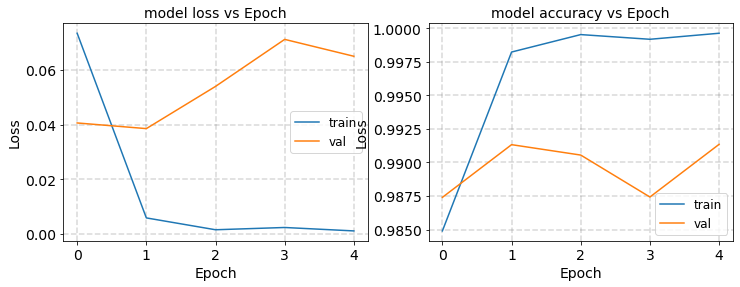

round1 [2 9 3 8]
2
Epoch 1/5
1250/1250 - 4s - loss: 0.1203 - accuracy: 0.9683 - val_loss: 0.0426 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 4s - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0577 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0686 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0891 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 4.5780e-05 - accuracy: 1.0000 - val_loss: 0.1001 - val_accuracy: 0.9882


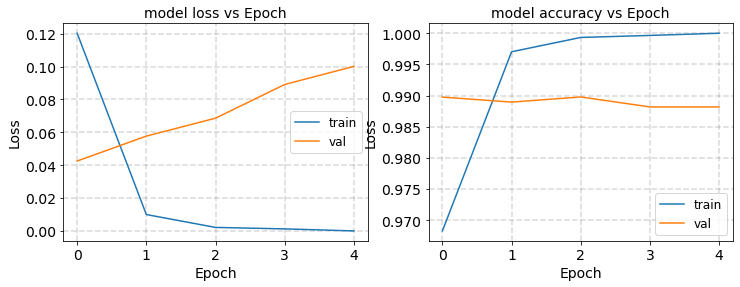

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0813 - accuracy: 0.9829 - val_loss: 0.0508 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 3s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0686 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 3s - loss: 3.9382e-04 - accuracy: 0.9999 - val_loss: 0.0802 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 3s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0772 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 3s - loss: 4.1387e-05 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9889


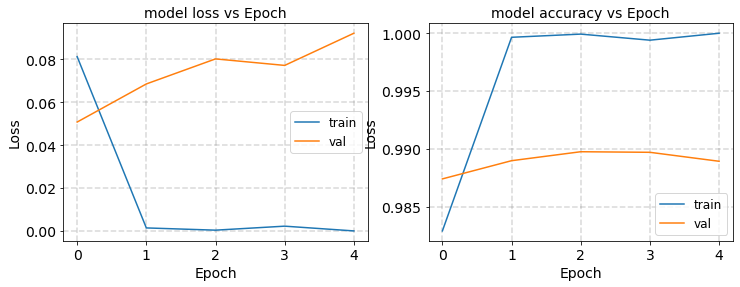

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1353 - accuracy: 0.9700 - val_loss: 0.0662 - val_accuracy: 0.9843
Epoch 2/5
1250/1250 - 3s - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0784 - val_accuracy: 0.9819
Epoch 3/5
1250/1250 - 3s - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.1084 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.1019 - val_accuracy: 0.9819
Epoch 5/5
1250/1250 - 3s - loss: 4.3381e-04 - accuracy: 0.9999 - val_loss: 0.1239 - val_accuracy: 0.9811


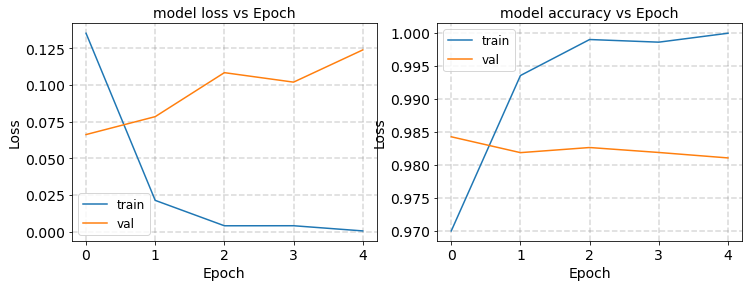

8
Epoch 1/5
1250/1250 - 2s - loss: 0.0900 - accuracy: 0.9806 - val_loss: 0.0597 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 2s - loss: 0.0098 - accuracy: 0.9974 - val_loss: 0.0663 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0914 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 1.1658e-04 - accuracy: 1.0000 - val_loss: 0.1129 - val_accuracy: 0.9810
Epoch 5/5
1250/1250 - 3s - loss: 4.0604e-05 - accuracy: 1.0000 - val_loss: 0.1261 - val_accuracy: 0.9810


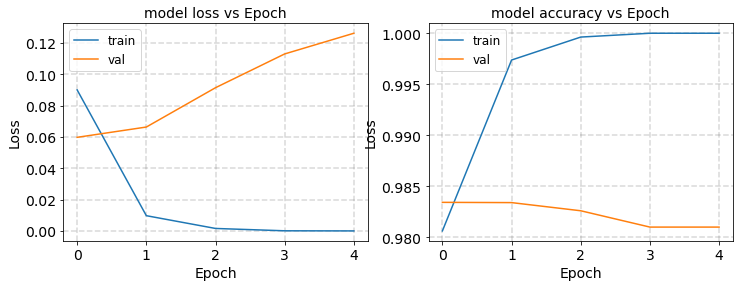

round2 [9 3 2 8]
9
Epoch 1/5
1250/1250 - 3s - loss: 0.0999 - accuracy: 0.9783 - val_loss: 0.0636 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.1227 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 3s - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.1036 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 1.5661e-04 - accuracy: 1.0000 - val_loss: 0.1311 - val_accuracy: 0.9874
Epoch 5/5
1250/1250 - 3s - loss: 3.6513e-05 - accuracy: 1.0000 - val_loss: 0.1511 - val_accuracy: 0.9874


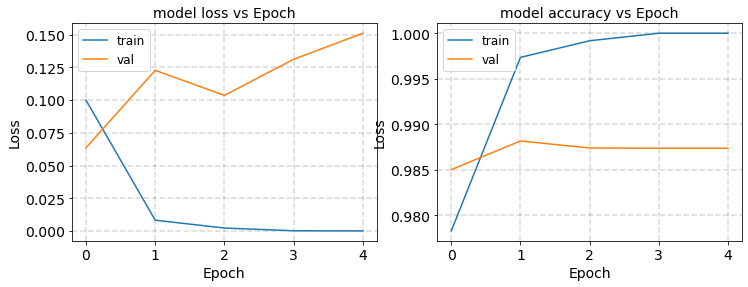

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1053 - accuracy: 0.9817 - val_loss: 0.0911 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.0941 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 3s - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.1211 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 3s - loss: 1.5996e-04 - accuracy: 1.0000 - val_loss: 0.1397 - val_accuracy: 0.9842
Epoch 5/5
1250/1250 - 3s - loss: 2.8314e-05 - accuracy: 1.0000 - val_loss: 0.1557 - val_accuracy: 0.9842


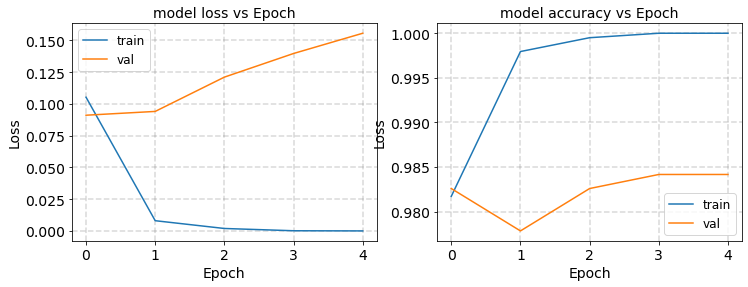

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1540 - accuracy: 0.9715 - val_loss: 0.0491 - val_accuracy: 0.9819
Epoch 2/5
1250/1250 - 3s - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0455 - val_accuracy: 0.9875
Epoch 3/5
1250/1250 - 3s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0553 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 3s - loss: 7.9567e-04 - accuracy: 0.9999 - val_loss: 0.0615 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 3s - loss: 1.6521e-04 - accuracy: 0.9999 - val_loss: 0.0675 - val_accuracy: 0.9914


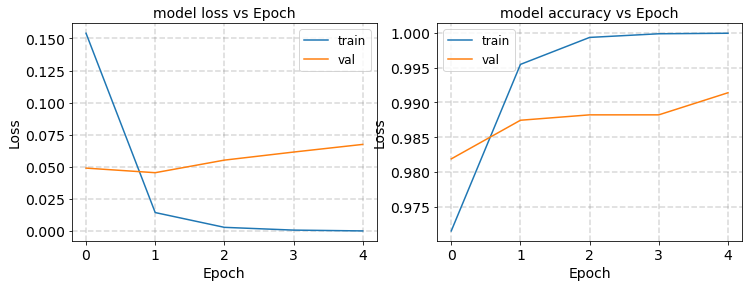

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1214 - accuracy: 0.9708 - val_loss: 0.0741 - val_accuracy: 0.9803
Epoch 2/5
1250/1250 - 3s - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0811 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0984 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 3s - loss: 5.7163e-04 - accuracy: 0.9999 - val_loss: 0.1079 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 3s - loss: 1.3500e-04 - accuracy: 1.0000 - val_loss: 0.1196 - val_accuracy: 0.9834


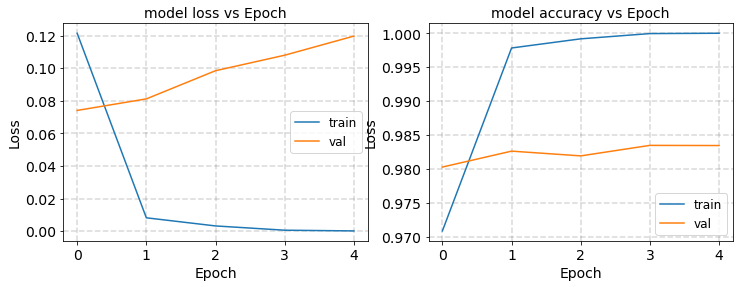

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_30 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_31 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_32 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_33 (None, 64)                8258      
_________________________________________________________________
dense_35 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

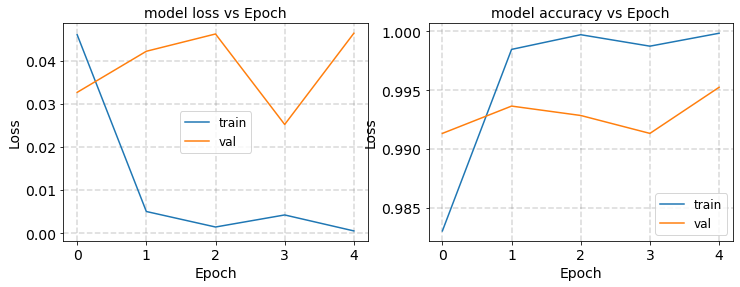

8
Epoch 1/5
1250/1250 - 4s - loss: 0.0957 - accuracy: 0.9741 - val_loss: 0.0578 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 5s - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0605 - val_accuracy: 0.9849
Epoch 3/5
1250/1250 - 5s - loss: 0.0044 - accuracy: 0.9988 - val_loss: 0.1034 - val_accuracy: 0.9787
Epoch 4/5
1250/1250 - 4s - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.1088 - val_accuracy: 0.9802
Epoch 5/5
1250/1250 - 5s - loss: 6.6429e-04 - accuracy: 0.9998 - val_loss: 0.1149 - val_accuracy: 0.9810


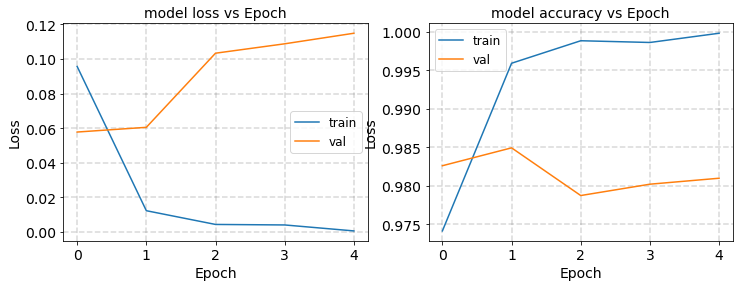

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1070 - accuracy: 0.9724 - val_loss: 0.0699 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 4s - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.0621 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 0.0067 - accuracy: 0.9984 - val_loss: 0.0817 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0919 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 4s - loss: 6.9341e-05 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 0.9866


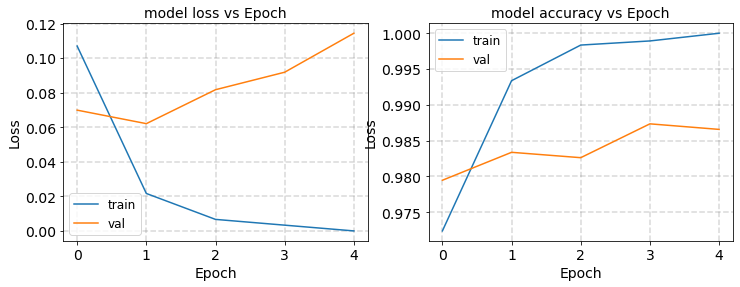

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0929 - accuracy: 0.9799 - val_loss: 0.0527 - val_accuracy: 0.9913
Epoch 2/5
1250/1250 - 4s - loss: 0.0148 - accuracy: 0.9947 - val_loss: 0.0601 - val_accuracy: 0.9922
Epoch 3/5
1250/1250 - 3s - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0649 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0943 - val_accuracy: 0.9882
Epoch 5/5
1250/1250 - 4s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1194 - val_accuracy: 0.9882


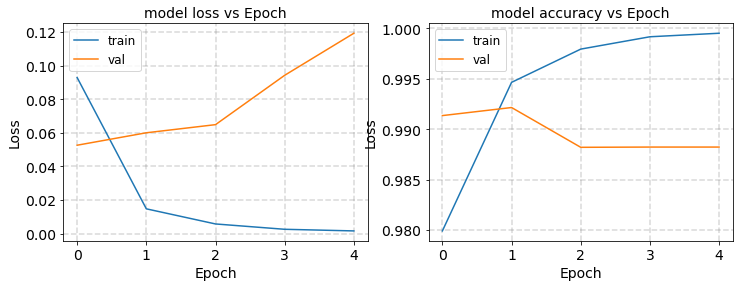

round1 [3 9 8 2]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.0954 - accuracy: 0.9769 - val_loss: 0.0771 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 4s - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.0918 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 3s - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0980 - val_accuracy: 0.9865
Epoch 4/5
1250/1250 - 4s - loss: 3.2457e-04 - accuracy: 0.9999 - val_loss: 0.1106 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 4.6486e-05 - accuracy: 1.0000 - val_loss: 0.1226 - val_accuracy: 0.9873


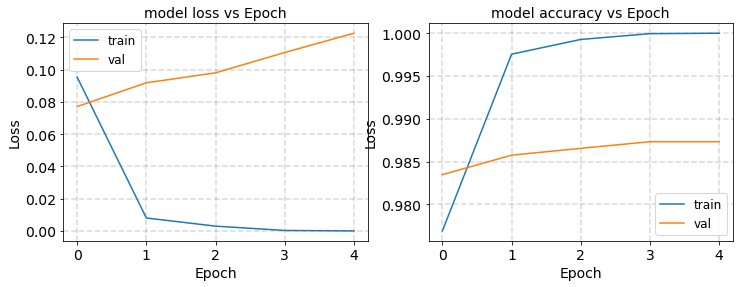

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0665 - accuracy: 0.9904 - val_loss: 0.0454 - val_accuracy: 0.9873
Epoch 2/5
1250/1250 - 4s - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0584 - val_accuracy: 0.9890
Epoch 3/5
1250/1250 - 4s - loss: 2.1022e-04 - accuracy: 1.0000 - val_loss: 0.0835 - val_accuracy: 0.9898
Epoch 4/5
1250/1250 - 5s - loss: 1.8127e-05 - accuracy: 1.0000 - val_loss: 0.0930 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 5s - loss: 6.4917e-06 - accuracy: 1.0000 - val_loss: 0.1019 - val_accuracy: 0.9906


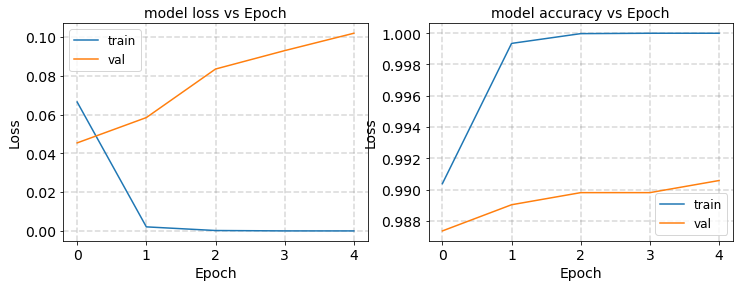

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1154 - accuracy: 0.9726 - val_loss: 0.0670 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 3s - loss: 0.0139 - accuracy: 0.9966 - val_loss: 0.0696 - val_accuracy: 0.9818
Epoch 3/5
1250/1250 - 4s - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0823 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 4s - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0960 - val_accuracy: 0.9826
Epoch 5/5
1250/1250 - 4s - loss: 1.6353e-04 - accuracy: 1.0000 - val_loss: 0.1233 - val_accuracy: 0.9818


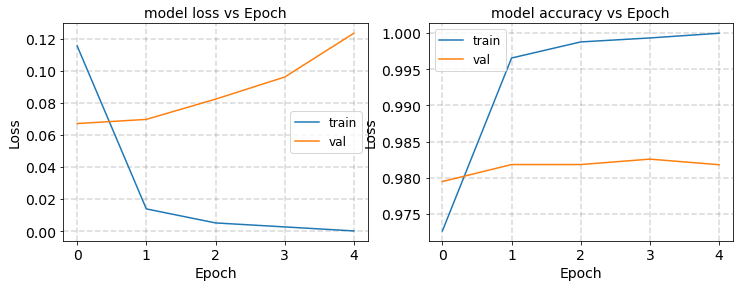

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0908 - accuracy: 0.9825 - val_loss: 0.0673 - val_accuracy: 0.9857
Epoch 2/5
1250/1250 - 4s - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0873 - val_accuracy: 0.9873
Epoch 3/5
1250/1250 - 4s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1524 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 4s - loss: 8.9903e-04 - accuracy: 0.9998 - val_loss: 0.1284 - val_accuracy: 0.9857
Epoch 5/5
1250/1250 - 4s - loss: 3.8256e-05 - accuracy: 1.0000 - val_loss: 0.1507 - val_accuracy: 0.9857


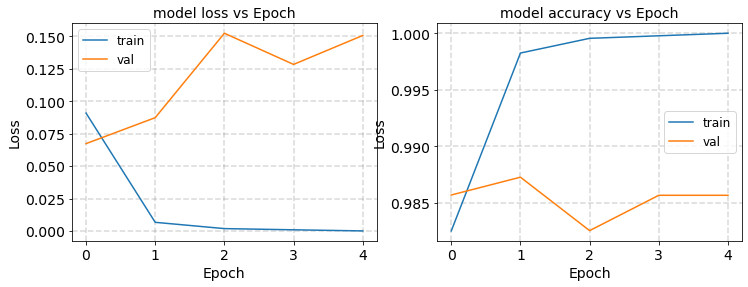

round2 [9 8 3 2]
9
Epoch 1/5
1250/1250 - 4s - loss: 0.1235 - accuracy: 0.9783 - val_loss: 0.0800 - val_accuracy: 0.9835
Epoch 2/5
1250/1250 - 4s - loss: 0.0125 - accuracy: 0.9952 - val_loss: 0.0775 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0945 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 3.4999e-04 - accuracy: 0.9999 - val_loss: 0.1221 - val_accuracy: 0.9827
Epoch 5/5
1250/1250 - 4s - loss: 5.3375e-05 - accuracy: 1.0000 - val_loss: 0.1387 - val_accuracy: 0.9835


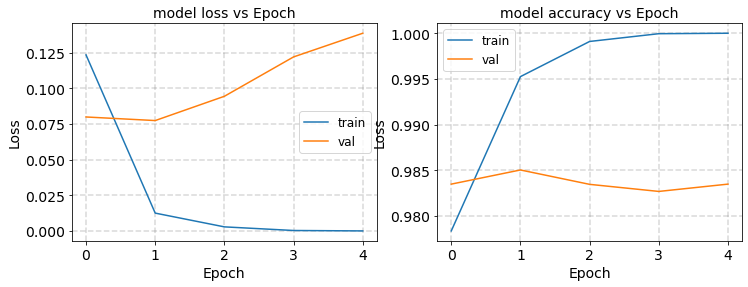

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1401 - accuracy: 0.9642 - val_loss: 0.0841 - val_accuracy: 0.9795
Epoch 2/5
1250/1250 - 4s - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.1099 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.1331 - val_accuracy: 0.9786
Epoch 4/5
1250/1250 - 4s - loss: 6.0796e-04 - accuracy: 0.9999 - val_loss: 0.1470 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 4s - loss: 8.6583e-05 - accuracy: 1.0000 - val_loss: 0.1676 - val_accuracy: 0.9826


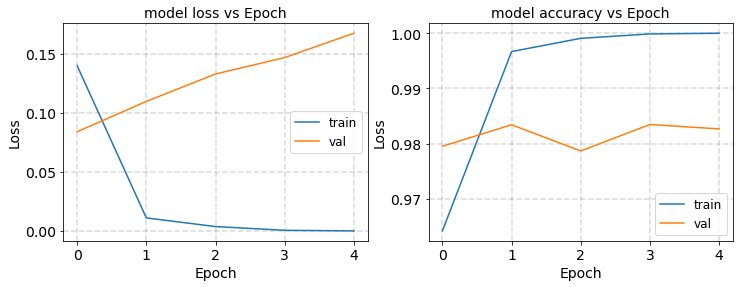

3
Epoch 1/5
1250/1250 - 4s - loss: 0.1571 - accuracy: 0.9708 - val_loss: 0.0632 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 4s - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.0846 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.1060 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 4s - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.1229 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 4s - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.1451 - val_accuracy: 0.9818


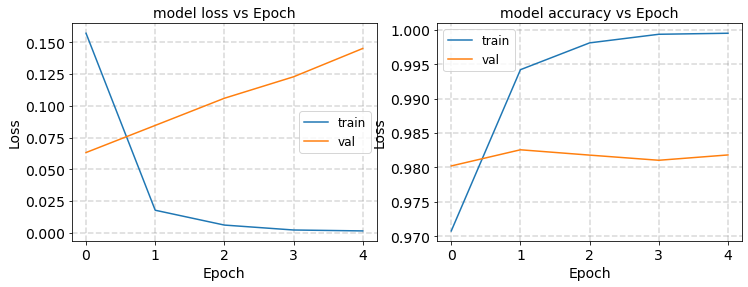

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1527 - accuracy: 0.9758 - val_loss: 0.0576 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 5s - loss: 0.0117 - accuracy: 0.9966 - val_loss: 0.0588 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 5s - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0778 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 5s - loss: 8.2234e-04 - accuracy: 0.9999 - val_loss: 0.0885 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 5s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0954 - val_accuracy: 0.9842


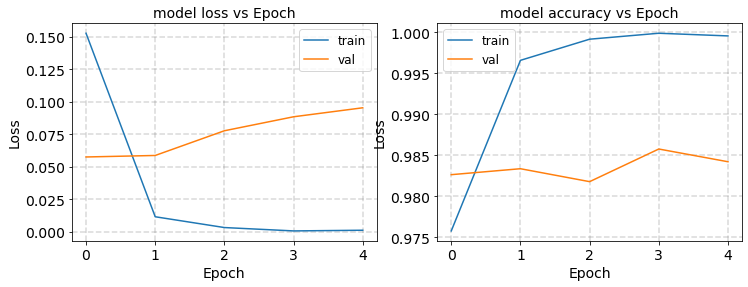

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_36 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_37 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_38 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_39 (None, 64)                8258      
_________________________________________________________________
dense_41 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

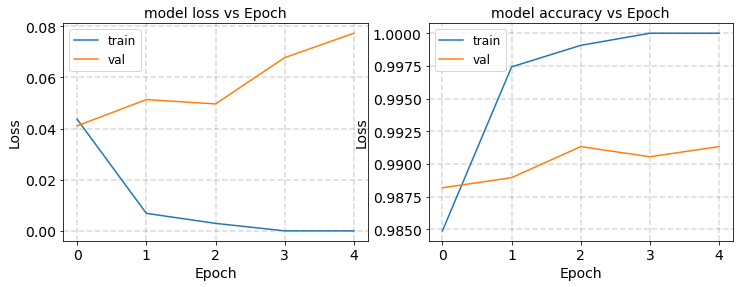

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1039 - accuracy: 0.9695 - val_loss: 0.0502 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 3s - loss: 0.0203 - accuracy: 0.9939 - val_loss: 0.0487 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.0582 - val_accuracy: 0.9843
Epoch 4/5
1250/1250 - 3s - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0827 - val_accuracy: 0.9771
Epoch 5/5
1250/1250 - 3s - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0993 - val_accuracy: 0.9834


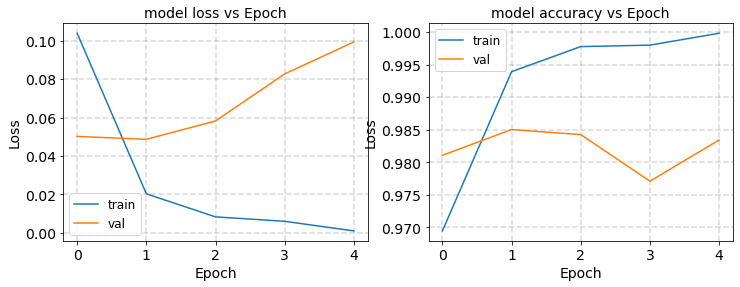

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1274 - accuracy: 0.9651 - val_loss: 0.0882 - val_accuracy: 0.9685
Epoch 2/5
1250/1250 - 3s - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0935 - val_accuracy: 0.9772
Epoch 3/5
1250/1250 - 3s - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0913 - val_accuracy: 0.9794
Epoch 4/5
1250/1250 - 3s - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.1131 - val_accuracy: 0.9755
Epoch 5/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.1366 - val_accuracy: 0.9755


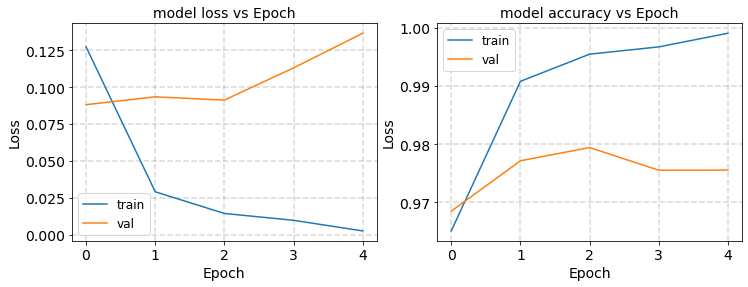

2
Epoch 1/5
1250/1250 - 3s - loss: 0.0938 - accuracy: 0.9797 - val_loss: 0.0601 - val_accuracy: 0.9834
Epoch 2/5
1250/1250 - 3s - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0799 - val_accuracy: 0.9843
Epoch 3/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0564 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0494 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 3s - loss: 4.5207e-04 - accuracy: 0.9999 - val_loss: 0.0579 - val_accuracy: 0.9913


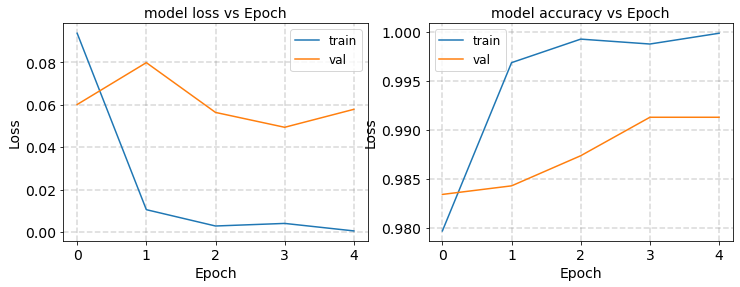

round1 [3 8 9 2]
3
Epoch 1/5
1250/1250 - 4s - loss: 0.1164 - accuracy: 0.9689 - val_loss: 0.0989 - val_accuracy: 0.9723
Epoch 2/5
1250/1250 - 4s - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.1000 - val_accuracy: 0.9779
Epoch 3/5
1250/1250 - 4s - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.1401 - val_accuracy: 0.9771
Epoch 4/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.1828 - val_accuracy: 0.9723
Epoch 5/5
1250/1250 - 4s - loss: 0.0047 - accuracy: 0.9984 - val_loss: 0.1931 - val_accuracy: 0.9771


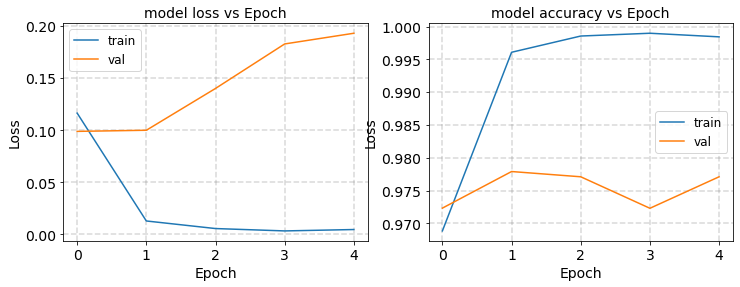

8
Epoch 1/5
1250/1250 - 5s - loss: 0.0979 - accuracy: 0.9753 - val_loss: 0.0608 - val_accuracy: 0.9732
Epoch 2/5
1250/1250 - 5s - loss: 0.0120 - accuracy: 0.9968 - val_loss: 0.0701 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 6s - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0951 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 6s - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0911 - val_accuracy: 0.9825
Epoch 5/5
1250/1250 - 5s - loss: 5.8697e-04 - accuracy: 0.9998 - val_loss: 0.1253 - val_accuracy: 0.9818


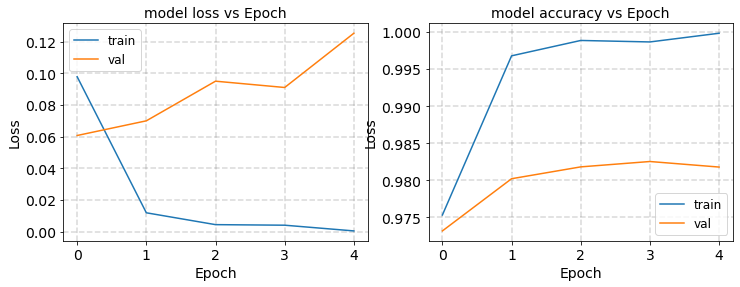

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0969 - accuracy: 0.9801 - val_loss: 0.0496 - val_accuracy: 0.9851
Epoch 2/5
1250/1250 - 5s - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.0642 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 6s - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.0685 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 7.8474e-04 - accuracy: 0.9997 - val_loss: 0.0935 - val_accuracy: 0.9858
Epoch 5/5
1250/1250 - 6s - loss: 7.7751e-05 - accuracy: 1.0000 - val_loss: 0.1042 - val_accuracy: 0.9866


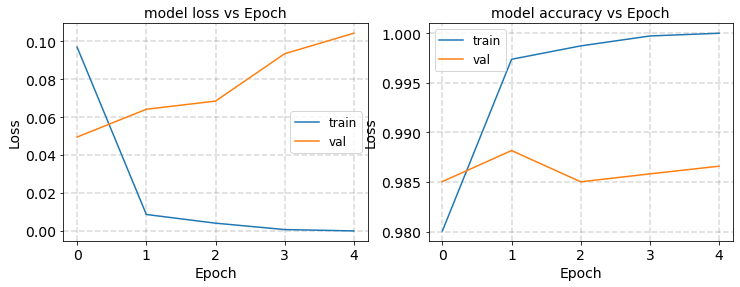

2
Epoch 1/5
1250/1250 - 6s - loss: 0.1316 - accuracy: 0.9764 - val_loss: 0.0764 - val_accuracy: 0.9874
Epoch 2/5
1250/1250 - 5s - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0959 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 4s - loss: 9.5058e-04 - accuracy: 0.9998 - val_loss: 0.1111 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.0881 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 5s - loss: 8.7422e-04 - accuracy: 0.9999 - val_loss: 0.0909 - val_accuracy: 0.9913


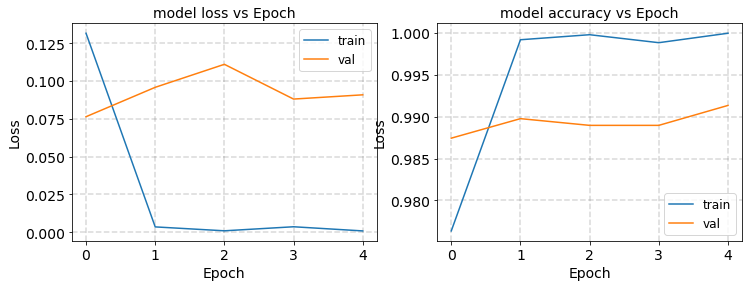

round2 [9 8 2 3]
9
Epoch 1/5
1250/1250 - 4s - loss: 0.1142 - accuracy: 0.9795 - val_loss: 0.0769 - val_accuracy: 0.9818
Epoch 2/5
1250/1250 - 5s - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0979 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 4s - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.1275 - val_accuracy: 0.9795
Epoch 4/5
1250/1250 - 4s - loss: 6.0006e-04 - accuracy: 0.9998 - val_loss: 0.1293 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 4s - loss: 4.0571e-05 - accuracy: 1.0000 - val_loss: 0.1415 - val_accuracy: 0.9818


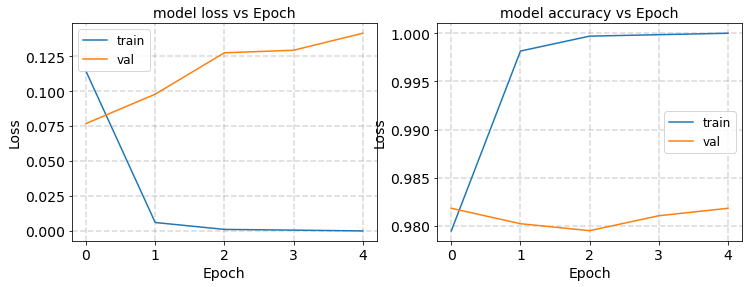

8
Epoch 1/5
1250/1250 - 5s - loss: 0.1099 - accuracy: 0.9704 - val_loss: 0.0417 - val_accuracy: 0.9889
Epoch 2/5
1250/1250 - 5s - loss: 0.0049 - accuracy: 0.9987 - val_loss: 0.0576 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0516 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 1.7605e-04 - accuracy: 1.0000 - val_loss: 0.0618 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 4s - loss: 4.4524e-05 - accuracy: 1.0000 - val_loss: 0.0699 - val_accuracy: 0.9905


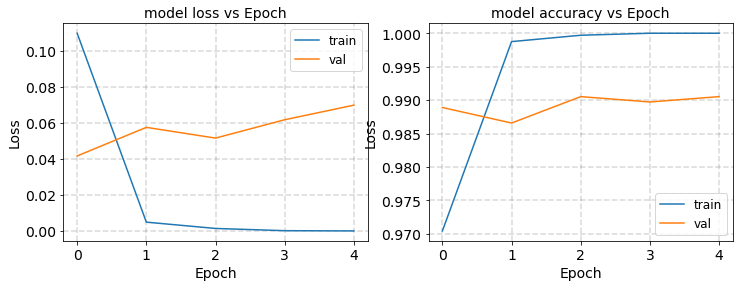

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1594 - accuracy: 0.9647 - val_loss: 0.0573 - val_accuracy: 0.9882
Epoch 2/5
1250/1250 - 4s - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0732 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.0930 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 4s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.0875 - val_accuracy: 0.9906
Epoch 5/5
1250/1250 - 4s - loss: 5.6908e-04 - accuracy: 0.9999 - val_loss: 0.1052 - val_accuracy: 0.9898


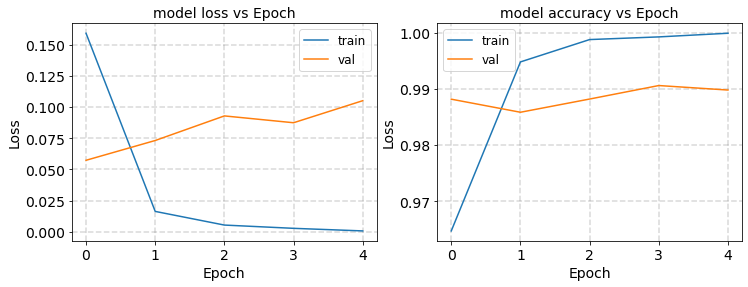

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1320 - accuracy: 0.9711 - val_loss: 0.0652 - val_accuracy: 0.9738
Epoch 2/5
1250/1250 - 3s - loss: 0.0198 - accuracy: 0.9941 - val_loss: 0.0680 - val_accuracy: 0.9778
Epoch 3/5
1250/1250 - 3s - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0752 - val_accuracy: 0.9810
Epoch 4/5
1250/1250 - 3s - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.0959 - val_accuracy: 0.9818
Epoch 5/5
1250/1250 - 3s - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.1208 - val_accuracy: 0.9810


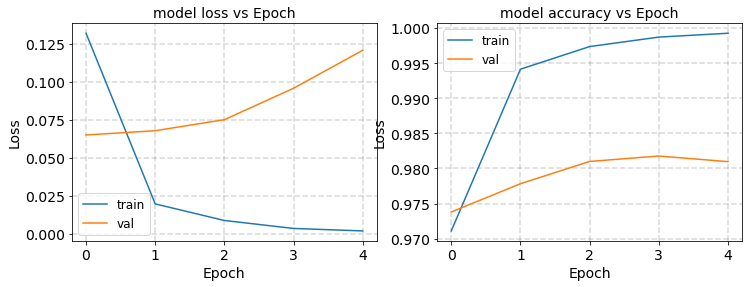

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_42 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_43 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_44 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_45 (None, 64)                8258      
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

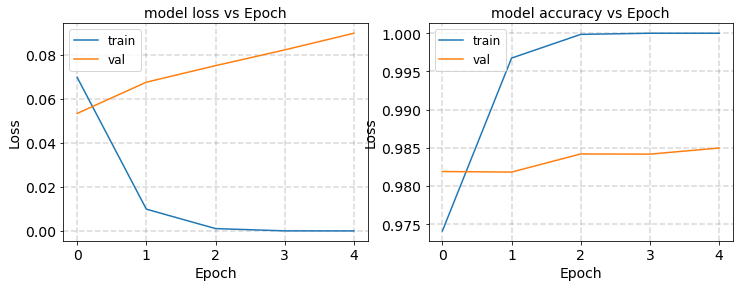

9
Epoch 1/5
1250/1250 - 5s - loss: 0.0655 - accuracy: 0.9864 - val_loss: 0.0551 - val_accuracy: 0.9811
Epoch 2/5
1250/1250 - 4s - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0650 - val_accuracy: 0.9874
Epoch 3/5
1250/1250 - 4s - loss: 7.6262e-04 - accuracy: 0.9998 - val_loss: 0.0934 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 4s - loss: 4.3988e-05 - accuracy: 1.0000 - val_loss: 0.0976 - val_accuracy: 0.9898
Epoch 5/5
1250/1250 - 4s - loss: 1.0246e-05 - accuracy: 1.0000 - val_loss: 0.1041 - val_accuracy: 0.9905


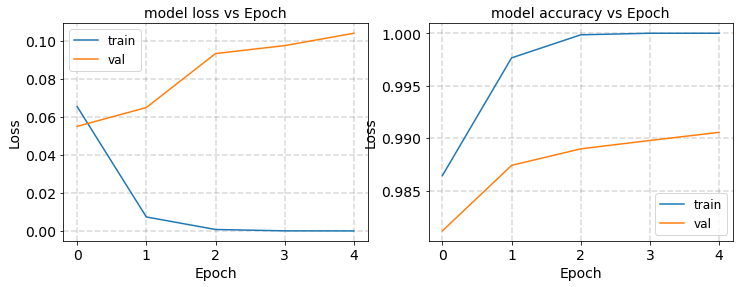

2
Epoch 1/5
1250/1250 - 4s - loss: 0.1172 - accuracy: 0.9793 - val_loss: 0.0473 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 4s - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.0494 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 4s - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0564 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 4s - loss: 5.6998e-04 - accuracy: 0.9999 - val_loss: 0.0623 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 5.2209e-05 - accuracy: 1.0000 - val_loss: 0.0692 - val_accuracy: 0.9913


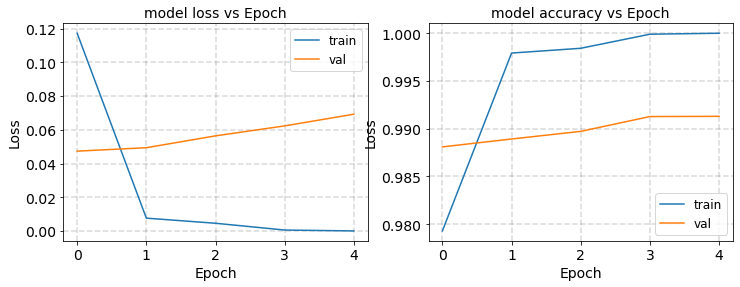

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1079 - accuracy: 0.9747 - val_loss: 0.0693 - val_accuracy: 0.9747
Epoch 2/5
1250/1250 - 4s - loss: 0.0185 - accuracy: 0.9951 - val_loss: 0.0878 - val_accuracy: 0.9755
Epoch 3/5
1250/1250 - 4s - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.1265 - val_accuracy: 0.9771
Epoch 4/5
1250/1250 - 4s - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0851 - val_accuracy: 0.9827
Epoch 5/5
1250/1250 - 5s - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0964 - val_accuracy: 0.9811


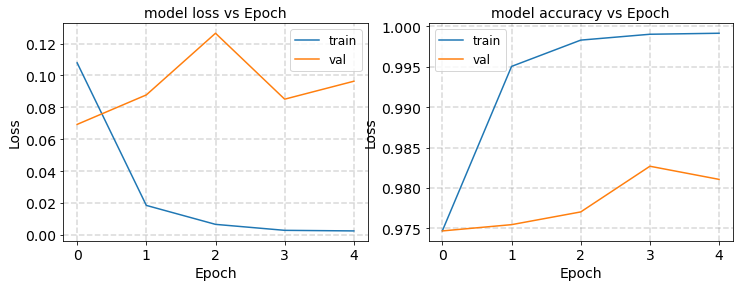

round1 [3 8 2 9]
3
Epoch 1/5
1250/1250 - 5s - loss: 5.8530e-05 - accuracy: 1.0000 - val_loss: 0.1077 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 5s - loss: 2.1502e-05 - accuracy: 1.0000 - val_loss: 0.1152 - val_accuracy: 0.9834
Epoch 3/5
1250/1250 - 4s - loss: 9.2436e-06 - accuracy: 1.0000 - val_loss: 0.1236 - val_accuracy: 0.9834
Epoch 4/5
1250/1250 - 4s - loss: 4.2449e-06 - accuracy: 1.0000 - val_loss: 0.1327 - val_accuracy: 0.9834
Epoch 5/5
1250/1250 - 4s - loss: 2.0341e-06 - accuracy: 1.0000 - val_loss: 0.1406 - val_accuracy: 0.9842


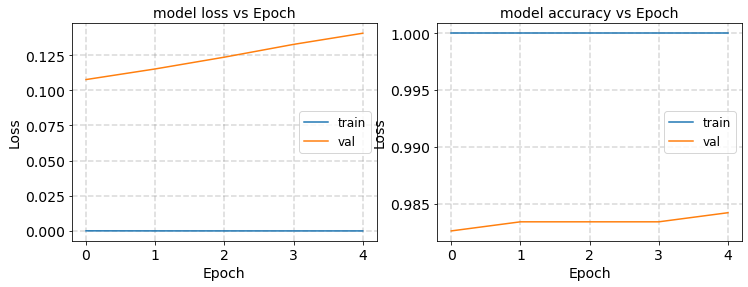

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1138 - accuracy: 0.9756 - val_loss: 0.0503 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 0.0118 - accuracy: 0.9969 - val_loss: 0.0677 - val_accuracy: 0.9801
Epoch 3/5
1250/1250 - 4s - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0812 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 4s - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0773 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 4s - loss: 1.0302e-04 - accuracy: 1.0000 - val_loss: 0.0918 - val_accuracy: 0.9865


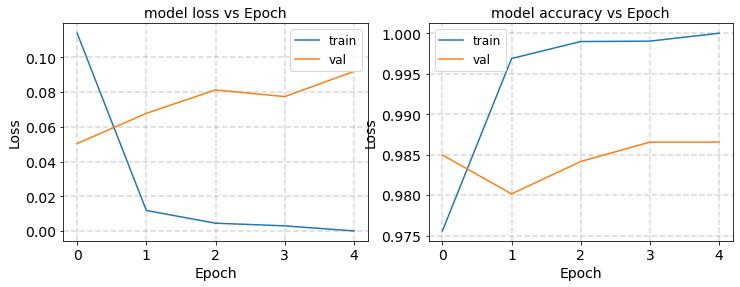

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0936 - accuracy: 0.9792 - val_loss: 0.0828 - val_accuracy: 0.9849
Epoch 2/5
1250/1250 - 4s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0839 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 4s - loss: 2.7161e-04 - accuracy: 0.9999 - val_loss: 0.0973 - val_accuracy: 0.9897
Epoch 4/5
1250/1250 - 4s - loss: 3.3204e-05 - accuracy: 1.0000 - val_loss: 0.1099 - val_accuracy: 0.9905
Epoch 5/5
1250/1250 - 3s - loss: 1.1305e-05 - accuracy: 1.0000 - val_loss: 0.1211 - val_accuracy: 0.9905


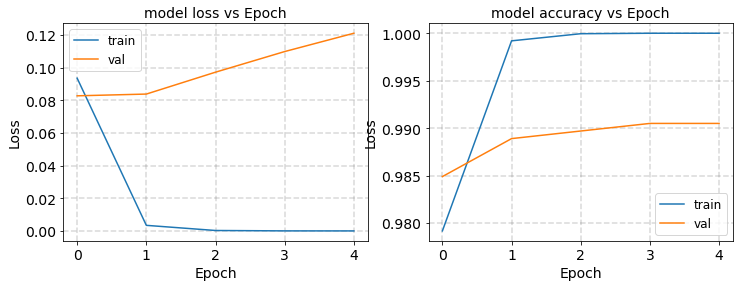

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0777 - accuracy: 0.9895 - val_loss: 0.0584 - val_accuracy: 0.9898
Epoch 2/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0928 - val_accuracy: 0.9898
Epoch 3/5
1250/1250 - 3s - loss: 4.6792e-04 - accuracy: 0.9999 - val_loss: 0.1015 - val_accuracy: 0.9890
Epoch 4/5
1250/1250 - 3s - loss: 3.6119e-05 - accuracy: 1.0000 - val_loss: 0.1183 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 3s - loss: 1.2067e-05 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 0.9898


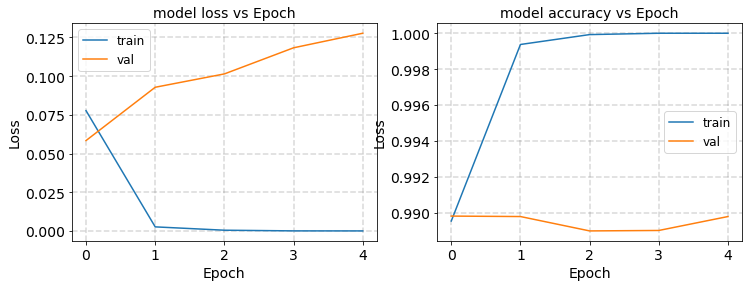

round2 [8 2 3 9]
8
Epoch 1/5
1250/1250 - 3s - loss: 0.1171 - accuracy: 0.9768 - val_loss: 0.0519 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0067 - accuracy: 0.9984 - val_loss: 0.0727 - val_accuracy: 0.9850
Epoch 3/5
1250/1250 - 3s - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.0760 - val_accuracy: 0.9857
Epoch 4/5
1250/1250 - 3s - loss: 3.7466e-04 - accuracy: 0.9999 - val_loss: 0.0811 - val_accuracy: 0.9865
Epoch 5/5
1250/1250 - 3s - loss: 8.6217e-05 - accuracy: 1.0000 - val_loss: 0.0948 - val_accuracy: 0.9873


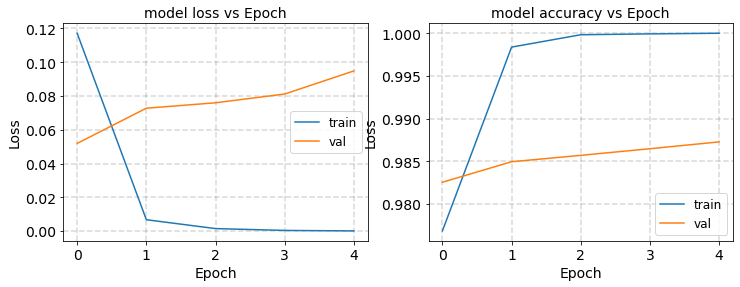

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1202 - accuracy: 0.9807 - val_loss: 0.0988 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0665 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 3s - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0734 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 3s - loss: 6.6631e-04 - accuracy: 0.9999 - val_loss: 0.0779 - val_accuracy: 0.9889
Epoch 5/5
1250/1250 - 3s - loss: 1.7876e-04 - accuracy: 0.9999 - val_loss: 0.0923 - val_accuracy: 0.9889


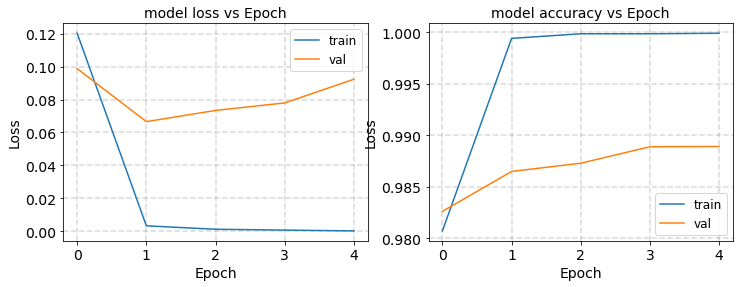

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1443 - accuracy: 0.9686 - val_loss: 0.0831 - val_accuracy: 0.9779
Epoch 2/5
1250/1250 - 3s - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0896 - val_accuracy: 0.9827
Epoch 3/5
1250/1250 - 3s - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0852 - val_accuracy: 0.9819
Epoch 4/5
1250/1250 - 3s - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0944 - val_accuracy: 0.9811
Epoch 5/5
1250/1250 - 3s - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0927 - val_accuracy: 0.9834


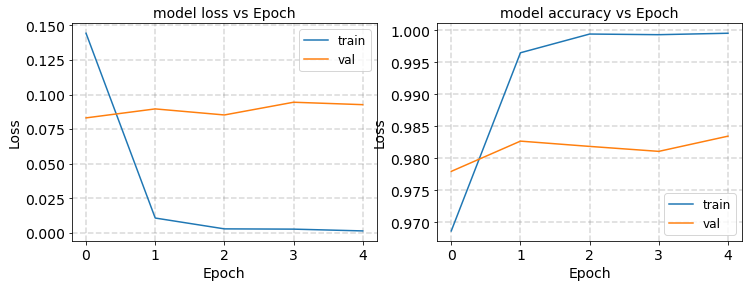

9
Epoch 1/5
1250/1250 - 3s - loss: 0.0903 - accuracy: 0.9843 - val_loss: 0.0765 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 3s - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.0795 - val_accuracy: 0.9866
Epoch 3/5
1250/1250 - 3s - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.1062 - val_accuracy: 0.9874
Epoch 4/5
1250/1250 - 3s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1164 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 3s - loss: 1.0578e-04 - accuracy: 1.0000 - val_loss: 0.1250 - val_accuracy: 0.9881


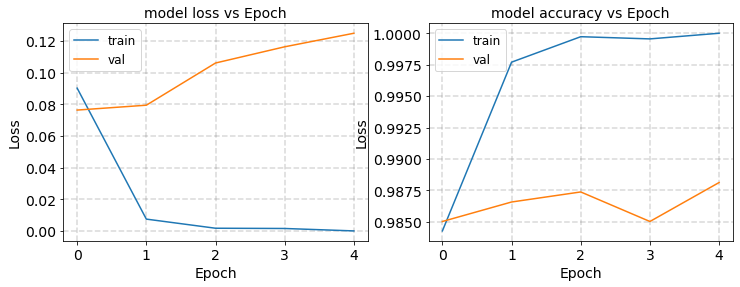

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_48 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_49 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_50 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_51 (None, 64)                8258      
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

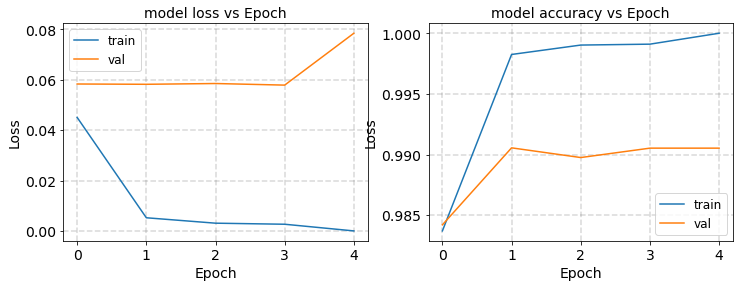

2
Epoch 1/5
1250/1250 - 3s - loss: 0.1017 - accuracy: 0.9750 - val_loss: 0.0515 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 3s - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0624 - val_accuracy: 0.9865
Epoch 3/5
1250/1250 - 3s - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0702 - val_accuracy: 0.9873
Epoch 4/5
1250/1250 - 3s - loss: 5.6958e-04 - accuracy: 0.9999 - val_loss: 0.0852 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 3s - loss: 1.0078e-04 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 0.9881


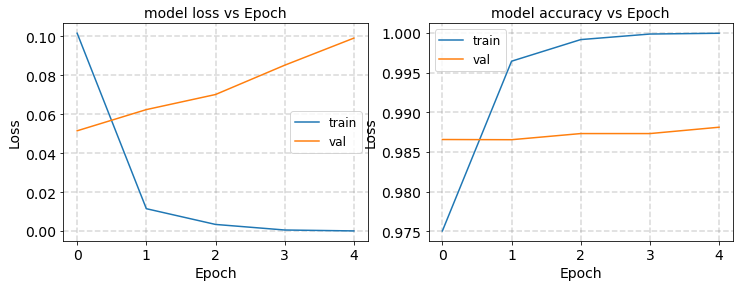

8
Epoch 1/5
1250/1250 - 3s - loss: 0.1212 - accuracy: 0.9643 - val_loss: 0.0659 - val_accuracy: 0.9763
Epoch 2/5
1250/1250 - 3s - loss: 0.0238 - accuracy: 0.9920 - val_loss: 0.0755 - val_accuracy: 0.9771
Epoch 3/5
1250/1250 - 3s - loss: 0.0112 - accuracy: 0.9967 - val_loss: 0.1137 - val_accuracy: 0.9770
Epoch 4/5
1250/1250 - 3s - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.1230 - val_accuracy: 0.9786
Epoch 5/5
1250/1250 - 3s - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.1283 - val_accuracy: 0.9779


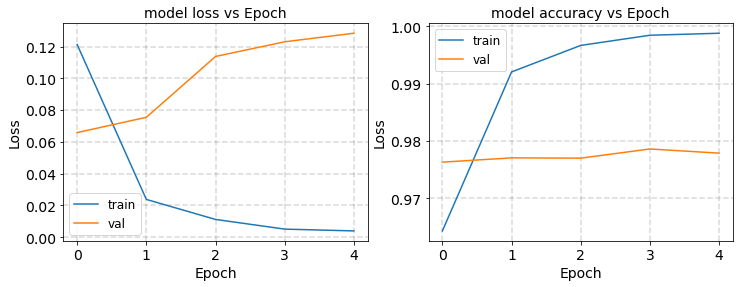

3
Epoch 1/5
1250/1250 - 3s - loss: 0.1260 - accuracy: 0.9696 - val_loss: 0.0695 - val_accuracy: 0.9826
Epoch 2/5
1250/1250 - 3s - loss: 0.0232 - accuracy: 0.9936 - val_loss: 0.0873 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 5s - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.0916 - val_accuracy: 0.9842
Epoch 4/5
1250/1250 - 5s - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.0957 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 5s - loss: 9.2622e-04 - accuracy: 0.9998 - val_loss: 0.1317 - val_accuracy: 0.9850


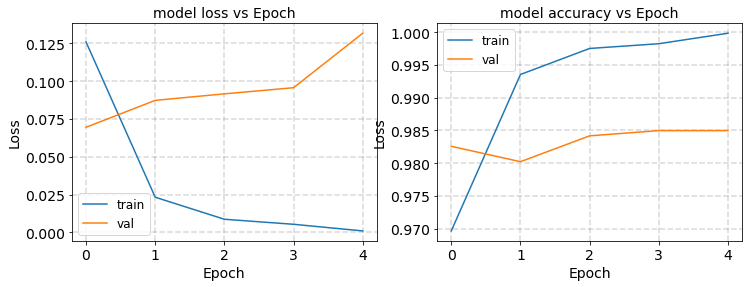

round1 [3 9 8 2]
3
Epoch 1/5
1250/1250 - 4s - loss: 8.8740e-05 - accuracy: 1.0000 - val_loss: 0.1459 - val_accuracy: 0.9850
Epoch 2/5
1250/1250 - 4s - loss: 3.5250e-05 - accuracy: 1.0000 - val_loss: 0.1601 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 4s - loss: 1.5747e-05 - accuracy: 1.0000 - val_loss: 0.1757 - val_accuracy: 0.9850
Epoch 4/5
1250/1250 - 5s - loss: 6.9670e-06 - accuracy: 1.0000 - val_loss: 0.1918 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 5s - loss: 3.0881e-06 - accuracy: 1.0000 - val_loss: 0.2053 - val_accuracy: 0.9850


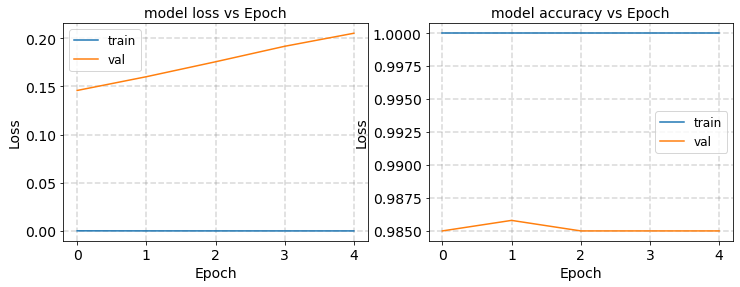

9
Epoch 1/5
1250/1250 - 4s - loss: 0.0963 - accuracy: 0.9840 - val_loss: 0.0477 - val_accuracy: 0.9866
Epoch 2/5
1250/1250 - 4s - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0637 - val_accuracy: 0.9889
Epoch 3/5
1250/1250 - 4s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0871 - val_accuracy: 0.9905
Epoch 4/5
1250/1250 - 4s - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0989 - val_accuracy: 0.9897
Epoch 5/5
1250/1250 - 4s - loss: 7.2673e-05 - accuracy: 1.0000 - val_loss: 0.1144 - val_accuracy: 0.9897


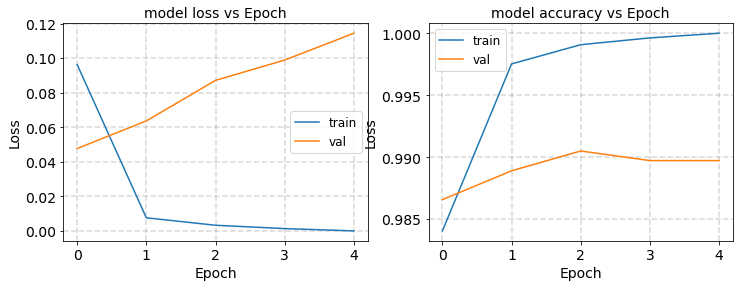

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1157 - accuracy: 0.9743 - val_loss: 0.0615 - val_accuracy: 0.9802
Epoch 2/5
1250/1250 - 4s - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0818 - val_accuracy: 0.9858
Epoch 3/5
1250/1250 - 5s - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.1140 - val_accuracy: 0.9841
Epoch 4/5
1250/1250 - 4s - loss: 1.9653e-04 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.9873
Epoch 5/5
1250/1250 - 4s - loss: 5.1201e-05 - accuracy: 1.0000 - val_loss: 0.1339 - val_accuracy: 0.9857


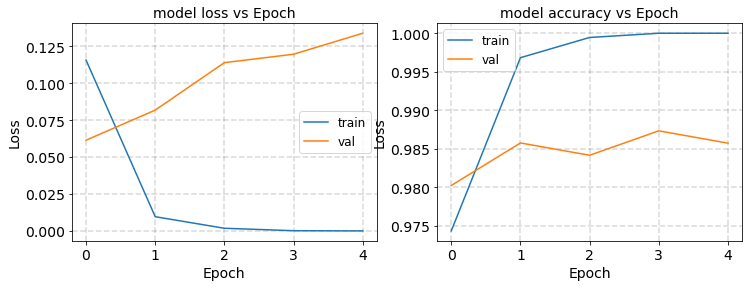

2
Epoch 1/5
1250/1250 - 4s - loss: 0.0915 - accuracy: 0.9848 - val_loss: 0.0559 - val_accuracy: 0.9881
Epoch 2/5
1250/1250 - 4s - loss: 0.0050 - accuracy: 0.9985 - val_loss: 0.0631 - val_accuracy: 0.9882
Epoch 3/5
1250/1250 - 5s - loss: 5.8315e-04 - accuracy: 0.9999 - val_loss: 0.0683 - val_accuracy: 0.9882
Epoch 4/5
1250/1250 - 5s - loss: 8.2950e-05 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9890
Epoch 5/5
1250/1250 - 5s - loss: 2.9128e-05 - accuracy: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9890


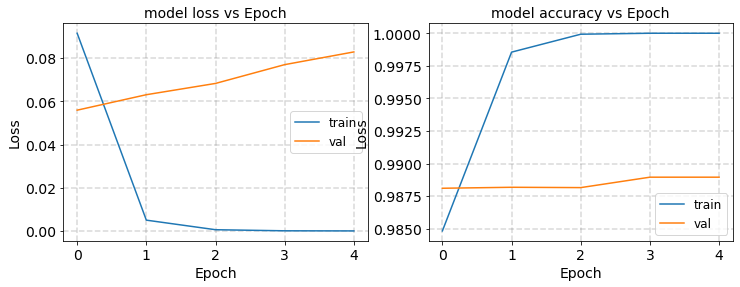

round2 [9 2 3 8]
9
Epoch 1/5
1250/1250 - 5s - loss: 0.0925 - accuracy: 0.9839 - val_loss: 0.0752 - val_accuracy: 0.9771
Epoch 2/5
1250/1250 - 4s - loss: 0.0104 - accuracy: 0.9970 - val_loss: 0.0891 - val_accuracy: 0.9826
Epoch 3/5
1250/1250 - 4s - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.1059 - val_accuracy: 0.9803
Epoch 4/5
1250/1250 - 5s - loss: 3.9113e-04 - accuracy: 0.9999 - val_loss: 0.1250 - val_accuracy: 0.9850
Epoch 5/5
1250/1250 - 5s - loss: 5.4946e-05 - accuracy: 1.0000 - val_loss: 0.1482 - val_accuracy: 0.9842


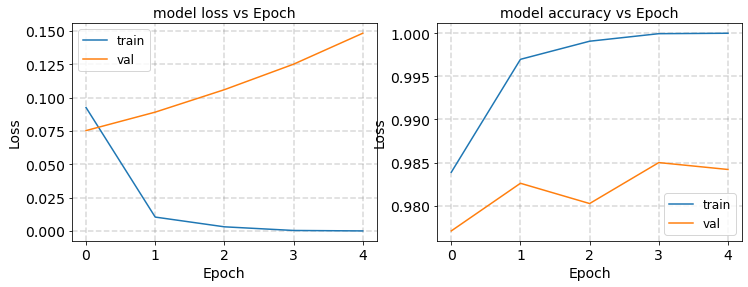

2
Epoch 1/5
1250/1250 - 5s - loss: 0.1097 - accuracy: 0.9819 - val_loss: 0.0334 - val_accuracy: 0.9890
Epoch 2/5
1250/1250 - 4s - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0471 - val_accuracy: 0.9913
Epoch 3/5
1250/1250 - 4s - loss: 2.4017e-04 - accuracy: 1.0000 - val_loss: 0.0652 - val_accuracy: 0.9913
Epoch 4/5
1250/1250 - 4s - loss: 3.4573e-05 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy: 0.9913
Epoch 5/5
1250/1250 - 4s - loss: 1.0950e-05 - accuracy: 1.0000 - val_loss: 0.0825 - val_accuracy: 0.9913


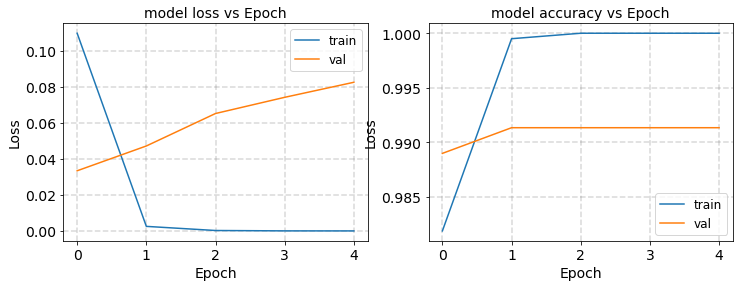

3
Epoch 1/5
1250/1250 - 5s - loss: 0.1693 - accuracy: 0.9626 - val_loss: 0.0966 - val_accuracy: 0.9707
Epoch 2/5
1250/1250 - 5s - loss: 0.0287 - accuracy: 0.9912 - val_loss: 0.0933 - val_accuracy: 0.9747
Epoch 3/5
1250/1250 - 4s - loss: 0.0125 - accuracy: 0.9973 - val_loss: 0.0930 - val_accuracy: 0.9826
Epoch 4/5
1250/1250 - 5s - loss: 0.0081 - accuracy: 0.9981 - val_loss: 0.1061 - val_accuracy: 0.9786
Epoch 5/5
1250/1250 - 4s - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.1549 - val_accuracy: 0.9763


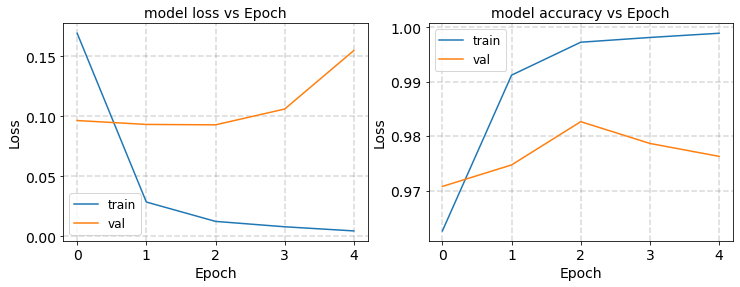

8
Epoch 1/5
1250/1250 - 4s - loss: 0.1129 - accuracy: 0.9755 - val_loss: 0.1014 - val_accuracy: 0.9778
Epoch 2/5
1250/1250 - 5s - loss: 0.0087 - accuracy: 0.9975 - val_loss: 0.1038 - val_accuracy: 0.9802
Epoch 3/5
1250/1250 - 4s - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.1293 - val_accuracy: 0.9818
Epoch 4/5
1250/1250 - 4s - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1524 - val_accuracy: 0.9809
Epoch 5/5
1250/1250 - 4s - loss: 5.3130e-05 - accuracy: 1.0000 - val_loss: 0.1779 - val_accuracy: 0.9818


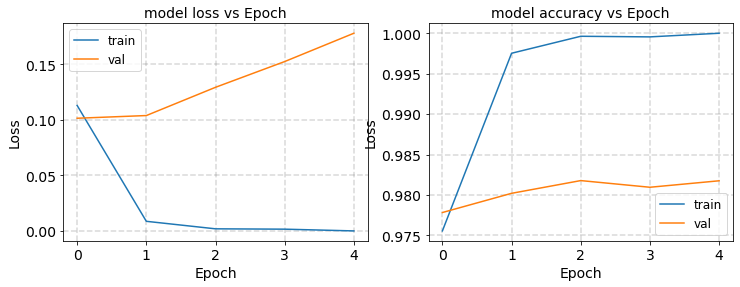

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_flatten_ (None, 784)               1         
_________________________________________________________________
prune_low_magnitude_dense_54 (None, 64)                100418    
_________________________________________________________________
prune_low_magnitude_dense_55 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_56 (None, 64)                8258      
_________________________________________________________________
prune_low_magnitude_dense_57 (None, 64)                8258      
_________________________________________________________________
dense_59 (Dense)             (None, 4)                 260       
Total params: 125,453
Trainable params: 62,980
Non-trainable params: 62,473
___________________________________________

In [4]:
%%time
series = [2,3,8,9]
num_runs = 10
name = '2389_seq_prune_04_4_64_run'
for i in range(num_runs):
    print(f'run {i}')
    full_name = name + str(i)
    
    
    model, history = nc.make_train_sequential_model(x_train=x_train,
                                  y_train=y_train,
                                  x_test=x_test,
                                  y_test=y_test,
                                  series=series,
                                  num_hidden_layers=4,
                                  num_hidden_nodes=64,
                                  num_output_nodes=4,
                                  pruning=0.4,
                                  epochs_per_numeral=5,
                                  num_cycles = 3, 
                                  verbose=2,
                                  summary=False)
    
    exp_dict[full_name] = nc.get_n_cuts_and_p_value(
                        model = model,
                        model_history = history,
                        num_clusters=4,
                        random_state=None,
                        identity=False,
                        start=1,
                        num_shuffle_trials=20)


#### Convert Results to a dataframe

In [5]:
df = pd.DataFrame(exp_dict)
df = df.T
df_models = df.iloc[:, 0]
df.columns = ['model','N_cut','Mean_n_cut_rand', 'Std_n_cut_rand', 'Ste_n_cut_rand', 'Percentile','P_value', 'Significance','Direction', 'Accuracy']
df = df.drop('model', axis=1)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_04_4_64_run0  1.81858         1.83446      0.0220133   
2389_seq_prune_04_4_64_run1  1.82147         1.82449      0.0171931   
2389_seq_prune_04_4_64_run2  1.84771         1.88511      0.0147173   
2389_seq_prune_04_4_64_run3  1.80086         1.81896       0.020185   
2389_seq_prune_04_4_64_run4  1.77916         1.78174      0.0182471   
2389_seq_prune_04_4_64_run5   1.8216         1.83978      0.0137373   
2389_seq_prune_04_4_64_run6  1.86567         1.89211      0.0201302   
2389_seq_prune_04_4_64_run7  1.71294         1.76463      0.0190444   
2389_seq_prune_04_4_64_run8  1.84992         1.83587      0.0187128   
2389_seq_prune_04_4_64_run9  1.66804         1.68237      0.0171911   

                            Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_04_4_64_run0     0.00492233         20     0.4           No   
2389_seq_prune_04_4_64_run1     0.00384448         55     0.9           No   
2389_seq_prune_04_4_64_run2     0.00329088          0       0          Yes   
2389_seq_prune_04_4_64_run3      0.0045135         25     0.5           No   
2389_seq_prune_04_4_64_run4     0.00408017         45     0.9           No   
2389_seq_prune_04_4_64_run5     0.00307175          0       0          Yes   
2389_seq_prune_04_4_64_run6     0.00450125          5     0.1           No   
2389_seq_prune_04_4_64_run7     0.00425846          0       0          Yes   
2389_seq_prune_04_4_64_run8     0.00418432         80     0.4           No   
2389_seq_prune_04_4_64_run9     0.00384405         25     0.5           No   

                            Direction  Accuracy  
2389_seq_prune_04_4_64_run0   smaller  0.939425  
2389_seq_prune_04_4_64_run1    larger   0.92495  
2389_seq_prune_04_4_64_run2   smaller    0.9518  
2389_seq_prune_04_4_64_run3   smaller  0.937675  
2389_seq_prune_04_4_64_run4   smaller   0.91405  
2389_seq_prune_04_4_64_run5   smaller  0.938425  
2389_seq_prune_04_4_64_run6   smaller   0.93045  
2389_seq_prune_04_4_64_run7   smaller    0.9407  
2389_seq_prune_04_4_64_run8    larger    0.9118  
2389_seq_prune_04_4_64_run9   smaller  0.943025

#### Save dataframe

In [6]:
import pickle

with open('df_'+ name, 'wb') as fp:
    pickle.dump(df, fp)
    
with open('df_'+ name, 'rb') as fp:
    df = pickle.load(fp)
df

N_cut Mean_n_cut_rand Std_n_cut_rand  \
2389_seq_prune_04_4_64_run0  1.81858         1.83446      0.0220133   
2389_seq_prune_04_4_64_run1  1.82147         1.82449      0.0171931   
2389_seq_prune_04_4_64_run2  1.84771         1.88511      0.0147173   
2389_seq_prune_04_4_64_run3  1.80086         1.81896       0.020185   
2389_seq_prune_04_4_64_run4  1.77916         1.78174      0.0182471   
2389_seq_prune_04_4_64_run5   1.8216         1.83978      0.0137373   
2389_seq_prune_04_4_64_run6  1.86567         1.89211      0.0201302   
2389_seq_prune_04_4_64_run7  1.71294         1.76463      0.0190444   
2389_seq_prune_04_4_64_run8  1.84992         1.83587      0.0187128   
2389_seq_prune_04_4_64_run9  1.66804         1.68237      0.0171911   

                            Ste_n_cut_rand Percentile P_value Significance  \
2389_seq_prune_04_4_64_run0     0.00492233         20     0.4           No   
2389_seq_prune_04_4_64_run1     0.00384448         55     0.9           No   
2389_seq_prune_04_4_64_run2     0.00329088          0       0          Yes   
2389_seq_prune_04_4_64_run3      0.0045135         25     0.5           No   
2389_seq_prune_04_4_64_run4     0.00408017         45     0.9           No   
2389_seq_prune_04_4_64_run5     0.00307175          0       0          Yes   
2389_seq_prune_04_4_64_run6     0.00450125          5     0.1           No   
2389_seq_prune_04_4_64_run7     0.00425846          0       0          Yes   
2389_seq_prune_04_4_64_run8     0.00418432         80     0.4           No   
2389_seq_prune_04_4_64_run9     0.00384405         25     0.5           No   

                            Direction  Accuracy  
2389_seq_prune_04_4_64_run0   smaller  0.939425  
2389_seq_prune_04_4_64_run1    larger   0.92495  
2389_seq_prune_04_4_64_run2   smaller    0.9518  
2389_seq_prune_04_4_64_run3   smaller  0.937675  
2389_seq_prune_04_4_64_run4   smaller   0.91405  
2389_seq_prune_04_4_64_run5   smaller  0.938425  
2389_seq_prune_04_4_64_run6   smaller   0.93045  
2389_seq_prune_04_4_64_run7   smaller    0.9407  
2389_seq_prune_04_4_64_run8    larger    0.9118  
2389_seq_prune_04_4_64_run9   smaller  0.943025

In [7]:
df_models[0].layers[1].get_weights()[0]

array([[ 0.05427448, -0.        , -0.07642175, ...,  0.04433367,
        -0.08398184,  0.06758862],
       [-0.        , -0.0550293 ,  0.05052199, ...,  0.07504176,
         0.        ,  0.05326488],
       [-0.        ,  0.07891376,  0.07899963, ...,  0.        ,
         0.        ,  0.06790168],
       ...,
       [ 0.06274407, -0.06039036, -0.07745539, ...,  0.05569907,
         0.05693378, -0.08338676],
       [ 0.        ,  0.04433956,  0.07549251, ...,  0.04481212,
        -0.07678522,  0.        ],
       [ 0.05671208,  0.06012964,  0.08138333, ...,  0.065084  ,
         0.06193472,  0.08051787]], dtype=float32)

#### Look at results of first experiment

In [8]:
for val in exp_dict[name + str(0)]:
    print(val)

1.8185845704377712
1.8344555533967344
0.022013333734883667
0.004922331064258921
20.0
0.4
No
smaller
0.939424991607666
